In [ ]:
!pip install --upgrade --quiet yfinance==0.1.74
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf
import numpy as np
import math
from collections import Counter
from scipy.stats import bartlett
import statistics as st
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns 
import networkx as nx
import seaborn as sns
from tqdm import tqdm_notebook
from scipy.optimize import minimize
import seaborn as sns
from scipy.stats import shapiro, normaltest, anderson, kstest, t, norm
tickers = ['2CRSI.PA', 'AB.PA', 'ABCA.PA', 'ABEO.PA', 'ABNX.PA', 'ABVX.PA', 'ABLD.PA', 'ABO.PA', 'ACAN.PA', 'AC.PA', 'AAC.PA', 'AACW.PA', 'EOS.PA', 'ATI.PA', 'ALDV.PA', 'ADOC.PA', 'ADP.PA', 'ADUX.PA', 'ADVI.PA', 'AELIS.PA', 'AKOM.PA', 'AFME.PA', 'AF.PA', 'AI.PA', 'AIR.PA', 'AKW.PA', 'AAA.PA', 'ABIO.PA', 'ALD.PA', 'CDA.PA', 'ALO.PA', 'LTA.PA', 'ALTA.PA', 'AREIT.PA', 'ATE.PA', 'ALTUR.PA', 'AMPLI.PA', 'AMUN.PA', 'ANTIN.PA', 'APAM.PA', 'APM.PA', 'ARAMI.PA', 'MT.PA', 'ARG.PA', 'AKE.PA', 'ARTE.PA', 'PRC.PA', 'ARTO.PA', 'ASY.PA', 'ATEME.PA', 'ATLD.PA', 'ATO.PA', 'AUB.PA', 'AUGR.PA', 'AURE.PA', 'AURS.PA', 'AVT.PA', 'CS.PA', 'AXW.PA', 'BAIN.PA', 'BALYO.PA', 'BUI.PA', 'BASS.PA', 'BLC.PA', 'BLV.PA', 'BEN.PA', 'BB.PA', 'BIG.PA', 'BIM.PA', 'BLEE.PA', 'BNP.PA', 'BOI.PA', 'BOL.PA', 'BON.PA', 'BOTHE.PA', 'BSD.PA', 'EN.PA', 'BVI.PA', 'BUR.PA', 'CAT31.PA', 'CAFO.PA', 'CBDG.PA', 'CAP.PA', 'CARM.PA', 'CARP.PA', 'CA.PA', 'CO.PA', 'CAS.PA', 'CATG.PA', 'CTRG.PA', 'CATR.PA', 'CBOT.PA', 'CGM.PA', 'CYAD.PA', 'CFI.PA', 'CGG.PA', 'CGGBT.PA', 'CRI.PA', 'CHSR.PA', 'CDI.PA', 'CLA.PA', 'COM.PA', 'CNV.PA', 'COFA.PA', 'COH.PA', 'RE.PA', 'ODET.PA', 'COUR.PA', 'COV.PA', 'COVH.PA', 'CRAP.PA', 'CRAV.PA', 'CRBP2.PA', 'CIV.PA', 'CRLA.PA', 'CRLO.PA', 'CMO.PA', 'CNF.PA', 'CCN.PA', 'CAF.PA', 'CRSU.PA', 'CRTO.PA', 'ACA.PA', 'CROS.PA', 'SX.PA', 'BN.PA', 'AM.PA', 'DSY.PA', 'DBV.PA', 'DEE.PA', 'DEEW.PA', 'DEEZR.PA', 'DEEZW.PA', 'DKUPL.PA', 'DBG.PA', 'DGE.PA', 'DMSIM.PA', 'DPAM.PA', 'EDEN.PA', 'EDF.PA', 'FGR.PA', 'EKI.PA', 'ELEC.PA', 'EEM.PA', 'ELIOR.PA', 'ELIS.PA', 'ENGI.PA', 'EQS.PA', 'ERA.PA', 'ERYP.PA', 'ESI.PA', 'ESP.PA', 'EL.PA', 'ES.PA', 'EFI.PA', 'RF.PA', 'KINGS.PA', 'KINGW.PA', 'EUR.PA', 'EAPI.PA', 'ERF.PA', 'ENX.PA', 'ETL.PA', 'EGR.PA', 'EXN.PA', 'EXE.PA', 'EXPL.PA', 'EO.PA', 'FAYE.PA', 'FDJ.PA', 'FCMC.PA', 'FALG.PA', 'SACI.PA', 'ORIA.PA', 'FGA.PA', 'BERR.PA', 'EBPF.PA', 'FOAF.PA', 'FINM.PA', 'FNTS.PA', 'FIPP.PA', 'FNAC.PA', 'LEBL.PA', 'EURS.PA', 'INEA.PA', 'FLY.PA', 'SPEL.PA', 'FORE.PA', 'FORSE.PA', 'FDE.PA', 'FREY.PA', 'GALIM.PA', 'GAM.PA', 'GEA.PA', 'GFC.PA', 'GNE.PA', 'GNRO.PA', 'GNFT.PA', 'GV.PA', 'SIGHT.PA', 'GET.PA', 'GLO.PA', 'GPE.PA', 'GRVO.PA', 'CEN.PA', 'FLO.PA', 'GOE.PA', 'IRD.PA', 'GJAJ.PA', 'PARP.PA', 'SFPI.PA', 'GTBP.PA', 'GTT.PA', 'GBT.PA', 'GUI.PA', 'PIG.PA', 'HDF.PA', 'RMS.PA', 'HEXA.PA', 'HCO.PA', 'HOLN.PA', 'HDP.PA', 'ICAD.PA', 'IDL.PA', 'IDIP.PA', 'NK.PA', 'IMDA.PA', 'INFE.PA', 'INF.PA', 'IPH.PA', 'ITP.PA', 'ITXT.PA', 'IVA.PA', 'IPN.PA', 'IPS.PA', 'ITE.PA', 'JBOG.PA', 'JCQ.PA', 'DEC.PA', 'KOF.PA', 'KER.PA', 'LI.PA', 'KORI.PA', 'OR.PA', 'LACR.PA', 'MMB.PA', 'LAT.PA', 'LPE.PA', 'LOUP.PA', 'LSS.PA', 'LR.PA', 'LHYFE.PA', 'LIN.PA', 'FII.PA', 'LNA.PA', 'LBIRD.PA', 'MC.PA', 'LYS.PA', 'MRM.PA', 'MAAT.PA', 'MDM.PA', 'MALT.PA', 'MTU.PA', 'MAN.PA', 'IAM.PA', 'MKEA.PA', 'MAU.PA', 'MBWS.PA', 'MBWSZ.PA', 'MCPHY.PA', 'EDI.PA', 'MEDCL.PA', 'MEMS.PA', 'MERY.PA', 'MRK.PA', 'MRN.PA', 'METEX.PA', 'MMT.PA', 'ML.PA', 'MONC.PA', 'MONT.PA', 'MHM.PA', 'NACON.PA', 'NANO.PA', 'NAVYA.PA', 'NEOEN.PA', 'NRO.PA', 'NEX.PA', 'NXI.PA', 'NEXTS.PA', 'NHOA.PA', 'COX.PA', 'NOKIA.PA', 'NR21.PA', 'NRG.PA', 'SBT.PA', 'OLG.PA', 'ORA.PA', 'ORAP.PA', 'ORAPB.PA', 'OREGE.PA', 'ORP.PA', 'OSE.PA', 'OVH.PA', 'PID.PA', 'PAR.PA', 'PARRO.PA', 'PABSA.PA', 'PABSB.PA', 'PSAT.PA', 'PAT.PA', 'PCA.PA', 'RI.PA', 'PERR.PA', 'PEUG.PA', 'VACBS.PA', 'VACBT.PA', 'VAC.PA', 'PVL.PA', 'POM.PA', 'POXEL.PA', 'PREC.PA', 'PROAC.PA', 'PWG.PA', 'PUB.PA', 'QDT.PA', 'RAL.PA', 'GDS.PA', 'RX.PA', 'RCO.PA', 'RNO.PA', 'RXL.PA', 'RBT.PA', 'CBR.PA', 'CBE.PA', 'RBO.PA', 'ROTH.PA', 'RUI.PA', 'SK.PA', 'SAF.PA', 'SGO.PA', 'SABE.PA', 'SAMS.PA', 'SAN.PA', 'DIM.PA', 'SAVE.PA', 'CBSM.PA', 'SLB.PA', 'SU.PA', 'SCR.PA', 'SCHP.PA', 'SGRO.PA', 'SLCO.PA', 'SELER.PA', 'SEFER.PA', 'SESG.PA', 'SESL.PA', 'SRP.PA', 'SII.PA', 'SMCP.PA', 'SMTPC.PA', 'SFCA.PA', 'GLE.PA', 'SW.PA', 'SEC.PA', 'SOG.PA', 'SOI.PA', 'LOCAL.PA', 'S30.PA', 'SOLB.PA', 'SO.PA', 'SOP.PA', 'SPIE.PA', 'SQI.PA', 'DPT.PA', 'STF.PA', 'STLA.PA', 'STM.PA', 'SWP.PA', 'SDG.PA', 'TKTT.PA', 'TAYN.PA', 'TCHCS.PA', 'TE.PA', 'TEP.PA', 'TVRB.PA', 'TRACT.PA', 'TERBS.PA', 'TFI.PA', 'TFF.PA', 'HO.PA', 'THEP.PA', 'TKO.PA', 'TIPI.PA', 'TITC.PA', 'TTE.PA', 'EC.PA', 'TOUP.PA', 'EIFF.PA', 'TNG.PA', 'TRAN.PA', 'TRANW.PA', 'TRI.PA', 'UBI.PA', 'URW.PA', 'UNBL.PA', 'UFF.PA', 'FPG.PA', 'FR.PA', 'VK.PA', 'VKBS.PA', 'VLA.PA', 'VANTI.PA', 'VANBS.PA', 'VIE.PA', 'VRLA.PA', 'VMX.PA', 'VETO.PA', 'VCT.PA', 'VIL.PA', 'RIN.PA', 'DG.PA', 'VIRP.PA', 'VTR.PA', 'VIV.PA', 'VLTSA.PA', 'VRAP.PA', 'WAGA.PA', 'WAVE.PA', 'MF.PA', 'WLN.PA', 'XFAB.PA', 'XIL.PA', 'CV.PA']

**Сбор данных по дневным ценам активов и дневным объемам продаж**

In [ ]:
data = yf.download(tickers, start="2017-01-01", end="2017-12-31", interval = "1d")

[*********************100%***********************]  434 of 434 completed

60 Failed downloads:
- WAGA.PA: Data doesn't exist for startDate = 1483228800, endDate = 1514678400
- TERBS.PA: No data found for this date range, symbol may be delisted
- DMSIM.PA: No data found, symbol may be delisted
- VACBS.PA: No data found for this date range, symbol may be delisted
- NAVYA.PA: Data doesn't exist for startDate = 1483228800, endDate = 1514678400
- CGGBT.PA: No data found for this date range, symbol may be delisted
- KINGS.PA: Data doesn't exist for startDate = 1483228800, endDate = 1514678400
- NR21.PA: Data doesn't exist for startDate = 1483228800, endDate = 1514678400
- ABO.PA: No data found, symbol may be delisted
- MBWSZ.PA: No data found, symbol may be delisted
- DEEZR.PA: Data doesn't exist for startDate = 1483228800, endDate = 1514678400
- VRLA.PA: Data doesn't exist for startDate = 1483228800, endDate = 1514678400
- VKBS.PA: No data found, symbol may be delisted
- APM.PA: Data doesn'

In [ ]:
data_close = data["Close"]
data_volume = data["Volume"] # массив объёма продаж

counters = {}
for col in data_close.columns:
  counters[col] = 0
  for row in data_close.index:
    if np.isnan(data_close[col][row]):
      counters[col] += 1
to_drop = []
for col in counters:
  if counters[col] > 20:
    to_drop.append(col)

In [ ]:
data_close.drop(to_drop, axis = 1, inplace=True) 
data_volume.drop(to_drop, axis = 1, inplace=True) 

**Удаляем данные о днях, для которых более 300 активов заполнены NaN значениями**

In [ ]:
# удаляем строки (дни)
rows_to_drop = {}
for row in data_close.index:
    rows_to_drop[row] = 0
    for col in data_close.columns:
        if pd.isna(data_close[col][row]):
            rows_to_drop[row] += 1
for row in rows_to_drop:
    if rows_to_drop[row] > 300: #удаляем строку, если в этот день не торговались хотя бы 300 акций
        data_close.drop(row, axis = 0, inplace = True)
        data_volume.drop(row, axis = 0, inplace = True)

**Удаляем данные об активах, которые не торговались более 230 дней из 255**

In [ ]:
counters_zero_volume = {}
for col in data_close.columns:
  counters_zero_volume[col] = 0
  for row in data_close.index:
    if data_volume[col][row]==0:
      counters_zero_volume[col] += 1
to_drop_zero_volume = []
for col in counters_zero_volume:
  if counters_zero_volume[col] > 230:
    to_drop_zero_volume.append(col)

In [ ]:
data_close.drop(to_drop_zero_volume, axis = 1, inplace=True) 
data_volume.drop(to_drop_zero_volume, axis = 1, inplace=True) 

In [ ]:
# в каких столбцах остались NaN значения
counters_nan = []
for col in data_close.columns:
  if data_close[col].isnull().sum() > 0:
    print(col)
    counters_nan.append(col)

In [ ]:
data_close.drop(counters_nan, axis = 1, inplace=True) 
data_volume.drop(counters_nan, axis = 1, inplace=True) 

**Преобразование данных по ценам в данные по доходностям**

In [ ]:
profitability = np.log(data_close.pct_change()+1)

for col in profitability.columns: # заполнение NaN знаений средним по акции
    profitability[col].fillna(profitability[col].mean(), inplace=True)

In [ ]:
std_arr=[]
mean_arr=[]
for col in profitability.columns:
  std_arr.append(np.std(profitability[col].values))
  mean_arr.append(np.mean(profitability[col].values))
tickers_names = list(profitability.columns) 

In [ ]:
profitability

,AAA.PA,AB.PA,ABCA.PA,ABEO.PA,ABIO.PA,ABNX.PA,ABVX.PA,AC.PA,ACA.PA,ACAN.PA,...,VIV.PA,VK.PA,VLA.PA,VLTSA.PA,VMX.PA,VRAP.PA,VTR.PA,WAVE.PA,WLN.PA,XIL.PA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,0.007183,-0.002263,-0.000527,0.001758,0.000986,-0.005924,0.001239,0.000731,0.000596,0.001102,...,0.000844,-0.001176,-0.000531,0.000518,0.000514,0.000162,0.000023,0.001139,0.001646,0.005304
2017-01-03,0.441833,0.050010,0.000000,-0.000741,-0.009816,0.006952,-0.004773,0.024068,0.031946,0.000000,...,0.000829,0.019262,-0.006329,0.001124,-0.027507,0.010977,0.000000,-0.014401,-0.000187,0.120200
2017-01-04,0.000000,0.075391,0.002782,-0.012307,-0.006184,-0.018649,0.011102,0.022433,0.004482,-0.015504,...,0.005507,-0.008127,-0.028988,0.002245,-0.020121,-0.001311,-0.006653,0.002195,-0.008064,0.124491
2017-01-05,0.000000,-0.030214,-0.012579,-0.006399,0.003715,-0.009456,0.044726,0.015251,0.002436,0.015504,...,0.001646,0.000728,0.022618,0.006704,0.012121,-0.001751,-0.007774,-0.002745,-0.005097,0.077535
2017-01-06,-0.014389,-0.058097,-0.022761,-0.004921,-0.008067,-0.002378,0.010503,-0.002768,0.000405,0.000000,...,0.004922,0.028987,-0.003200,0.003335,-0.028515,-0.005710,-0.003505,-0.007615,-0.024328,-0.112239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,0.000000,0.001213,0.001594,0.006079,-0.005000,0.031749,0.036453,0.004201,-0.003893,0.024098,...,0.010951,0.029202,-0.007299,-0.061311,0.007194,0.000420,0.001333,0.002436,0.002368,-0.004866
2017-12-22,0.000000,-0.015883,-0.003190,-0.000242,0.020343,-0.042560,-0.024548,0.003587,-0.007117,0.023531,...,-0.008312,0.045553,0.010929,-0.004876,-0.003591,0.000000,0.001331,0.006548,-0.002368,-0.007098
2017-12-27,0.000000,0.004914,-0.001599,0.000242,0.018974,0.016173,-0.007126,0.004168,-0.007168,0.000000,...,-0.000659,0.037657,-0.014599,-0.004900,0.031861,-0.007159,0.007421,-0.015346,0.015725,-0.026887


In [ ]:
std_dict = {tickers_names[i]: std_arr[i] for i in range(len(tickers_names))}
mean_dict = {tickers_names[i]: mean_arr[i] for i in range(len(tickers_names))}
std_dict_sorted = dict(sorted(std_dict.items(), key=lambda item: item[1]))
mean_dict_sorted = dict(sorted(mean_dict.items(), key=lambda item: item[1]))

##**1.Efficient frontier**

**В качестве основных рассматриваемых активов были выбраны 15 лучших по риску и 12 по доходности, так как они могут быть интересны при сборе портфеля. А также 23 наиболее значимых актива индекса рынка CAC40.**

**23 актива из CAC40 (LVMH, L'Oreal, Hermes, Airbus, Schneiser Electric, Essilor Luxottica, Air Liquide, BNP Paribas, AXA, Kering, Vinci, Safran, Pernod Ricard, Capgemini, Credit Agricole, Thales, Compagnie de Saint-Gobain, Michelin, Carrefour, Bouygues, Renault, Vivendi, Alstom)**

In [ ]:
cac40_tickers = ['MC.PA', 'OR.PA', 'RMS.PA', 'AIR.PA', 'SU.PA', 'EL.PA', 'AI.PA', 'BNP.PA', 'CS.PA', 'KER.PA', 'DG.PA', 'SAF.PA', 'RI.PA', 'CAP.PA', 'ACA.PA', 'HO.PA', 'SGO.PA', 'ML.PA', 'CA.PA', 'EN.PA', 'RNO.PA', 'VIV.PA', 'ALO.PA']

**15 лучших активов по $\sigma$**

In [ ]:
best_by_std = list(std_dict_sorted.keys())[:15]

**12 лучших активов по $E$**

In [ ]:
best_by_mean = list(mean_dict_sorted.keys())[-12:]

In [ ]:
unique_50 = list(set(cac40_tickers + best_by_std + best_by_mean))

In [ ]:
unique = list(set(cac40_tickers + best_by_std + best_by_mean))

In [ ]:
len(unique_50)

50

In [ ]:
std_50_arr = []
mean_50_arr = []
for i in range(len(unique)):
  std_50_arr.append(std_dict[unique[i]])
  mean_50_arr.append(mean_dict[unique[i]])

##**Карта активов**

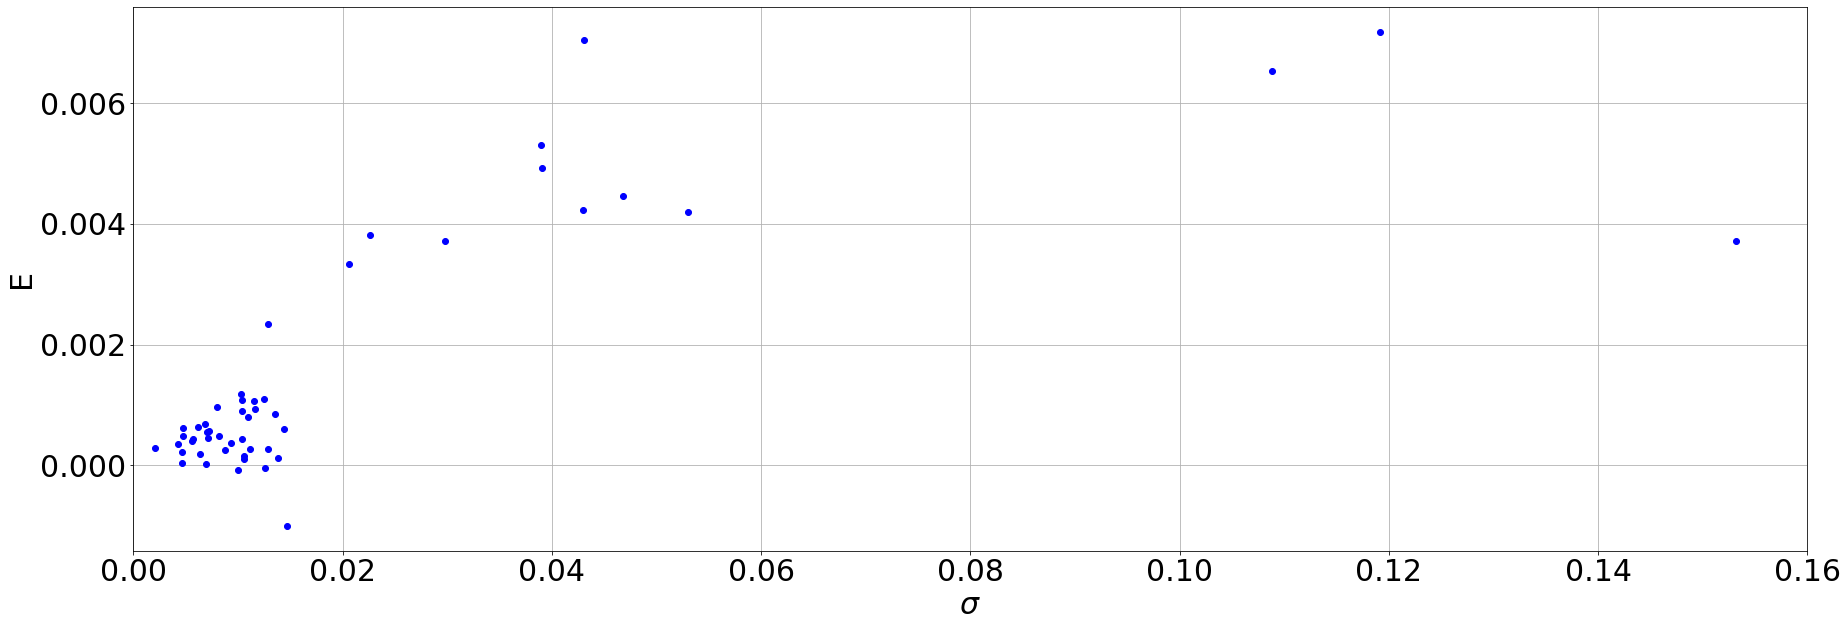

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_50_arr, mean_50_arr, 'bo')
plt.ylabel('E', size=30)
plt.xlabel('$\sigma$', size=30)
plt.xlim([0, 0.16])
plt.rc('axes', labelsize=30)
plt.rc('font', size=30)
plt.grid()
plt.show()

**Sequential Least SQuares Programming optimizer**

In [ ]:
def get_return_mean_cov(profitability_matrix):
  r_matrix = {}
  for ticker in unique:
    r_matrix[ticker] = profitability[ticker].values
  r_df = pd.DataFrame(r_matrix).dropna()
  return r_df.values, r_df.mean().values, r_df.cov().values

In [ ]:
def get_risk(X, cov_matrix):
    return np.sqrt(np.dot(np.dot(X, cov_matrix), X.T))
def optimize_portfolio(risk_porfolio,returns,mean_returns,cov_matrix,bounds,target=None):
    X = np.ones(returns.shape[1])
    X = X / X.sum() # Initial guess
    bounds = bounds * returns.shape[1]
    constraints=[]
    constraints.append({'type': 'eq', 'fun': lambda X: np.sum(X) - 1.0})
    if target:
        constraints.append({'type': 'eq','args': (mean_returns,),'fun': lambda X, mean_returns: portfolio_return - np.dot(X, mean_returns)})
    return minimize(risk_porfolio, X,args=(cov_matrix),method='SLSQP',constraints=constraints,bounds=bounds).x

**Эффективный фронт без ограничений на короткие продажи**

In [ ]:
sigmas = []
e = []
bounds = ((None, None),) 
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(profitability)
X_min_risk = optimize_portfolio(get_risk,r_matrix,mean_vec,cov_matrix,bounds)
min_risk = get_risk(X_min_risk, cov_matrix)
min_risk_preturn = np.dot(X_min_risk, mean_vec)
target = np.linspace(min_risk_preturn, 0.05, 500)
for portfolio_return in tqdm_notebook(target):
    X = optimize_portfolio(get_risk,r_matrix,mean_vec,cov_matrix,bounds,target=portfolio_return)
    sigmas.append(get_risk(X, cov_matrix))
    e.append(np.dot(X, mean_vec))

  0%|          | 0/500 [00:00<?, ?it/s]

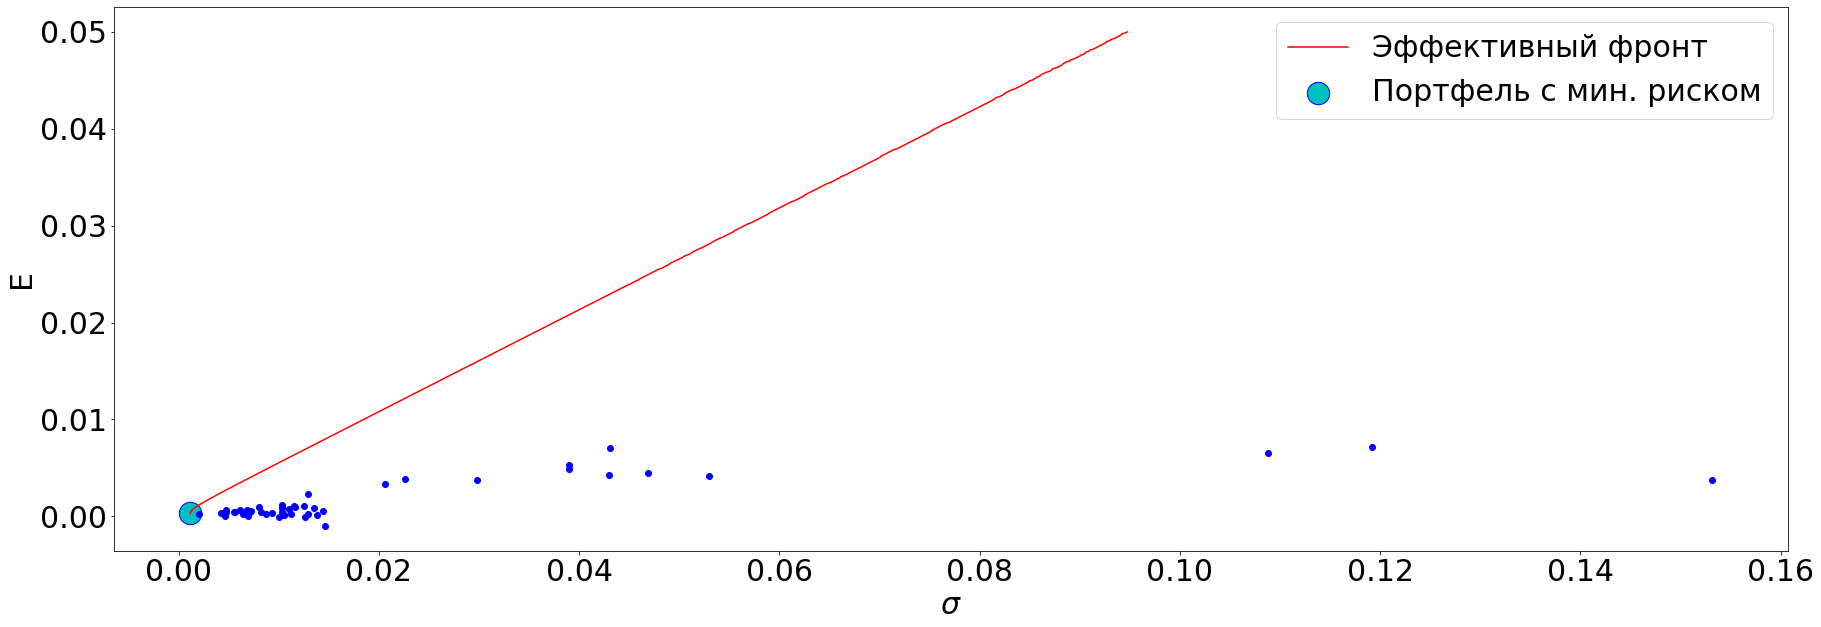

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_50_arr, mean_50_arr, 'bo')
plt.scatter(min_risk, min_risk_preturn, c='c',marker='.',s=2000, label='Портфель с мин. риском', edgecolors='blue',)
plt.plot(sigmas, e, 'r-', label='Эффективный фронт')
plt.legend()
plt.ylabel('E',size=30)
plt.xlabel('$\sigma$', size=30)
plt.rc('font', size=30)
plt.show()

In [ ]:
sigmas_ns = []
e_ns = []
bounds = ((0.0, 1.0),) 
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(profitability)
X_min_risk_ns = optimize_portfolio(get_risk,r_matrix,mean_vec,cov_matrix,bounds)
min_risk_ns = get_risk(X_min_risk_ns, cov_matrix)
min_risk_preturn_ns = np.dot(X_min_risk_ns, mean_vec)
target = np.linspace(min_risk_preturn_ns, 0.01, 500)
for portfolio_return in tqdm_notebook(target):
    X_ns = optimize_portfolio(get_risk,r_matrix,mean_vec,cov_matrix,bounds, target=portfolio_return)
    sigmas_ns.append(get_risk(X_ns, cov_matrix))
    e_ns.append(np.dot(X_ns, mean_vec))

  0%|          | 0/500 [00:00<?, ?it/s]

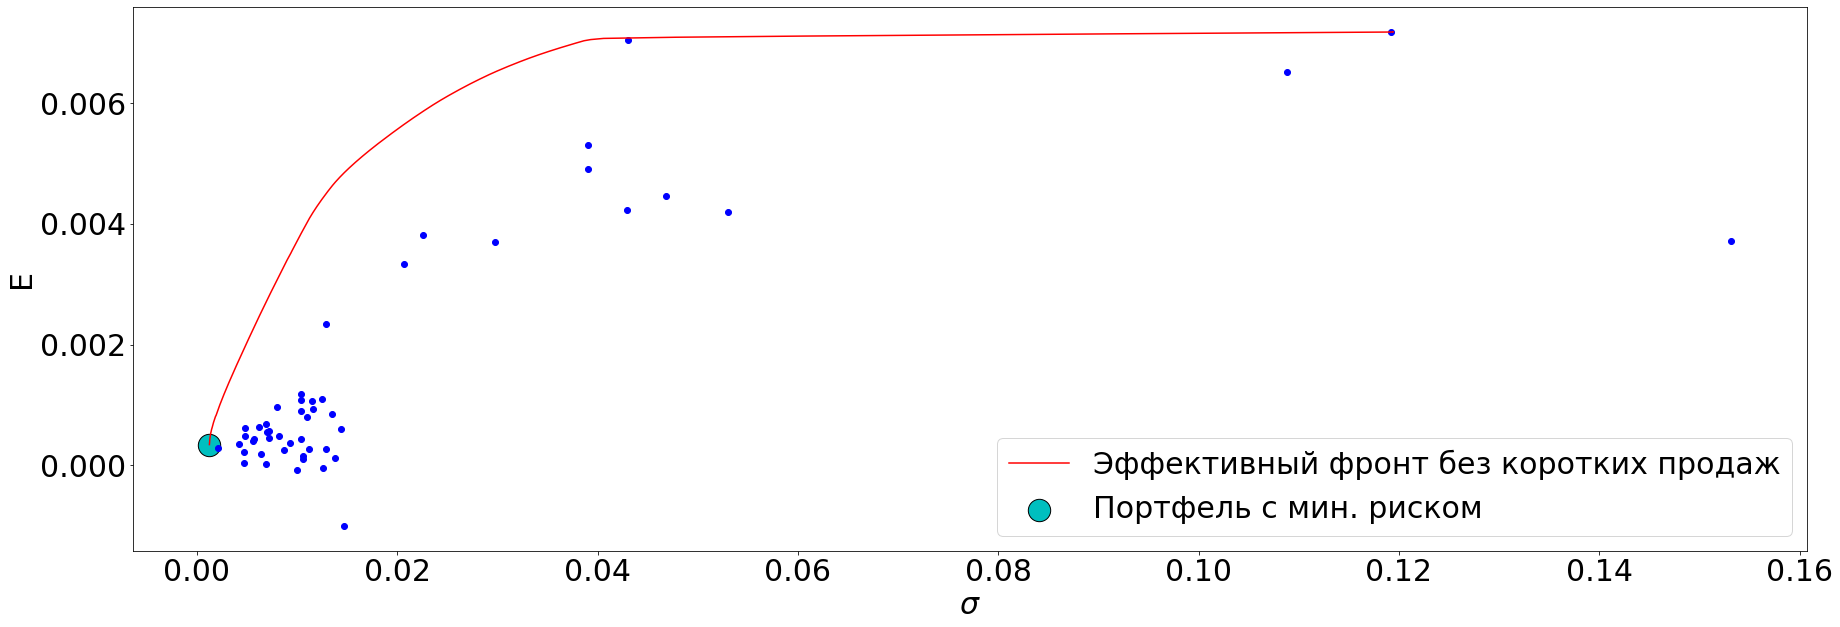

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_50_arr, mean_50_arr, 'bo')
plt.plot(sigmas_ns, e_ns, 'r-', label='Эффективный фронт без коротких продаж')
plt.scatter(min_risk_ns,min_risk_preturn_ns,c='c',marker='.',s=2000,edgecolors='black',label='Портфель с мин. риском')
plt.legend()
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.rc('font', size=30)
plt.show()

**Портфель с равными долями**

In [ ]:
num_of_tickers = len(profitability.columns)
portf_equal_shares = dict.fromkeys(profitability.index, 0)
for date in profitability.index:
  for col in profitability.columns:
    portf_equal_shares[date] += (1/num_of_tickers)*(profitability[col][date])

In [ ]:
portf_std = np.std(list(portf_equal_shares.values()))
portf_mean = np.mean(list(portf_equal_shares.values()))

In [ ]:
print("E=" + str(portf_mean) + ' \u03C3=' + str(portf_std))

E=0.0005564189535501447 σ=0.004042897582237101


**Индекс рынка**

In [ ]:
ticker = yf.Ticker('^FCHI')
if (ticker.info['regularMarketPrice'] != None):
  print("ok")

ok


In [ ]:
data_index = yf.download('^FCHI', start="2016-12-30", end="2017-12-31", interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_close_index = data_index["Close"]
profitability_index = np.log(data_close_index.pct_change()+1)
profitability_index.drop(data_close_index.index[0], axis = 0, inplace=True)

In [ ]:
index_std = np.std(profitability_index.values)
index_mean = np.mean(profitability_index.values)

In [ ]:
print("E=" + str(index_mean) + ' \u03C3=' + str(index_std))

E=0.00034729487706700957 σ=0.006594244034109824


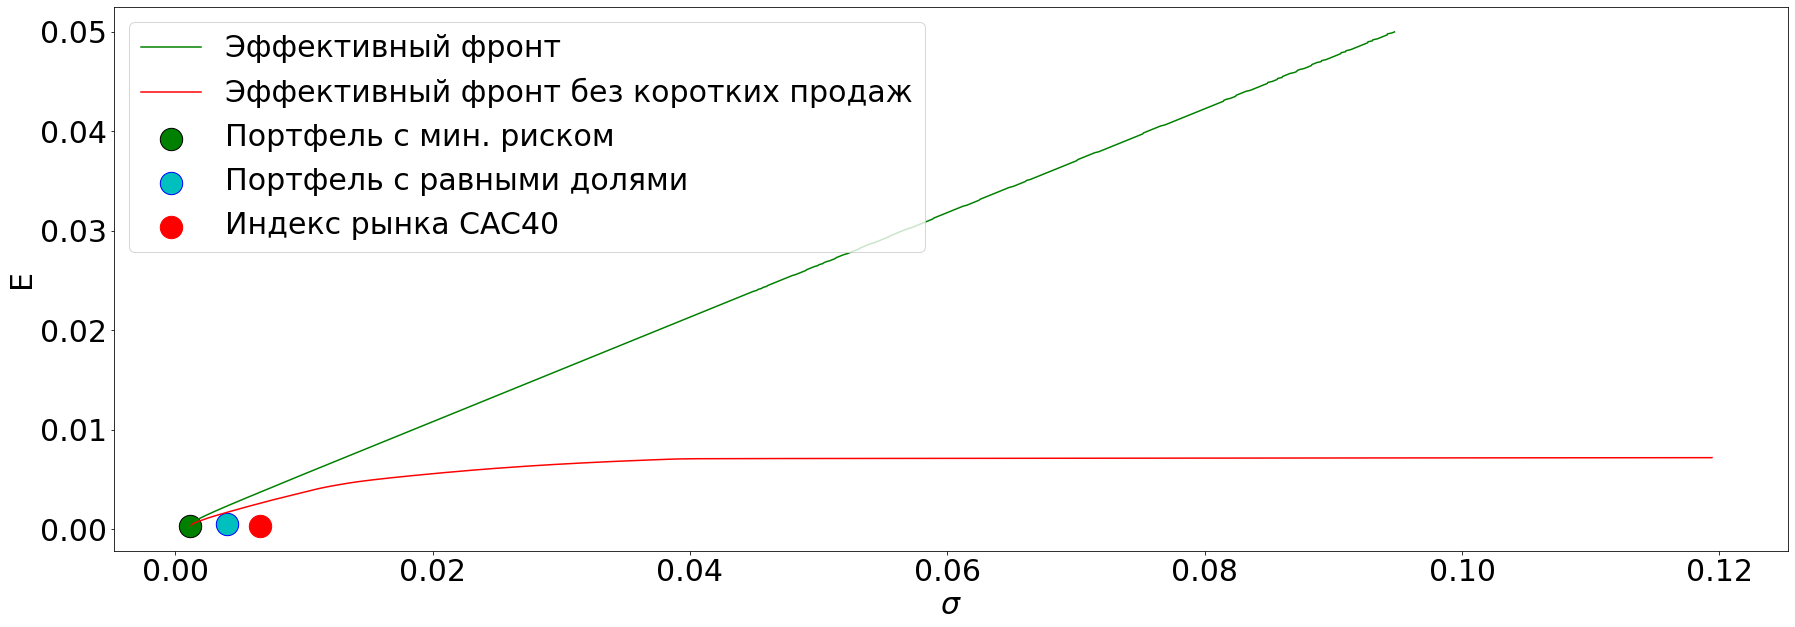

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(sigmas, e, 'g-', label='Эффективный фронт')
plt.plot(sigmas_ns, e_ns, 'r-', label='Эффективный фронт без коротких продаж')
plt.scatter(min_risk,min_risk_preturn,c='green',marker='.',s=2000,label='Портфель с мин. риском',edgecolors='black',)
plt.scatter(portf_std,portf_mean,c='c',marker='.',s=2000,label='Портфель с равными долями',edgecolors='blue',)
plt.scatter(index_std,index_mean,c='red',marker='.',s=2000,label='Индекс рынка CAC40',edgecolors='red',)
plt.legend()
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.rc('font', size=30)
plt.show()

##**2.Portfolio selection problem**

**1)5 лучших по E + 5 лучших по $\sigma$**

In [ ]:
best_by_std = list(std_dict_sorted.keys())[:5]
best_by_mean = list(mean_dict_sorted.keys())[-5:]
unique = list(set(best_by_std + best_by_mean))
std_10_arr = []
mean_10_arr = []
for i in range(len(unique)):
  std_10_arr.append(std_dict[unique[i]])
  mean_10_arr.append(mean_dict[unique[i]])

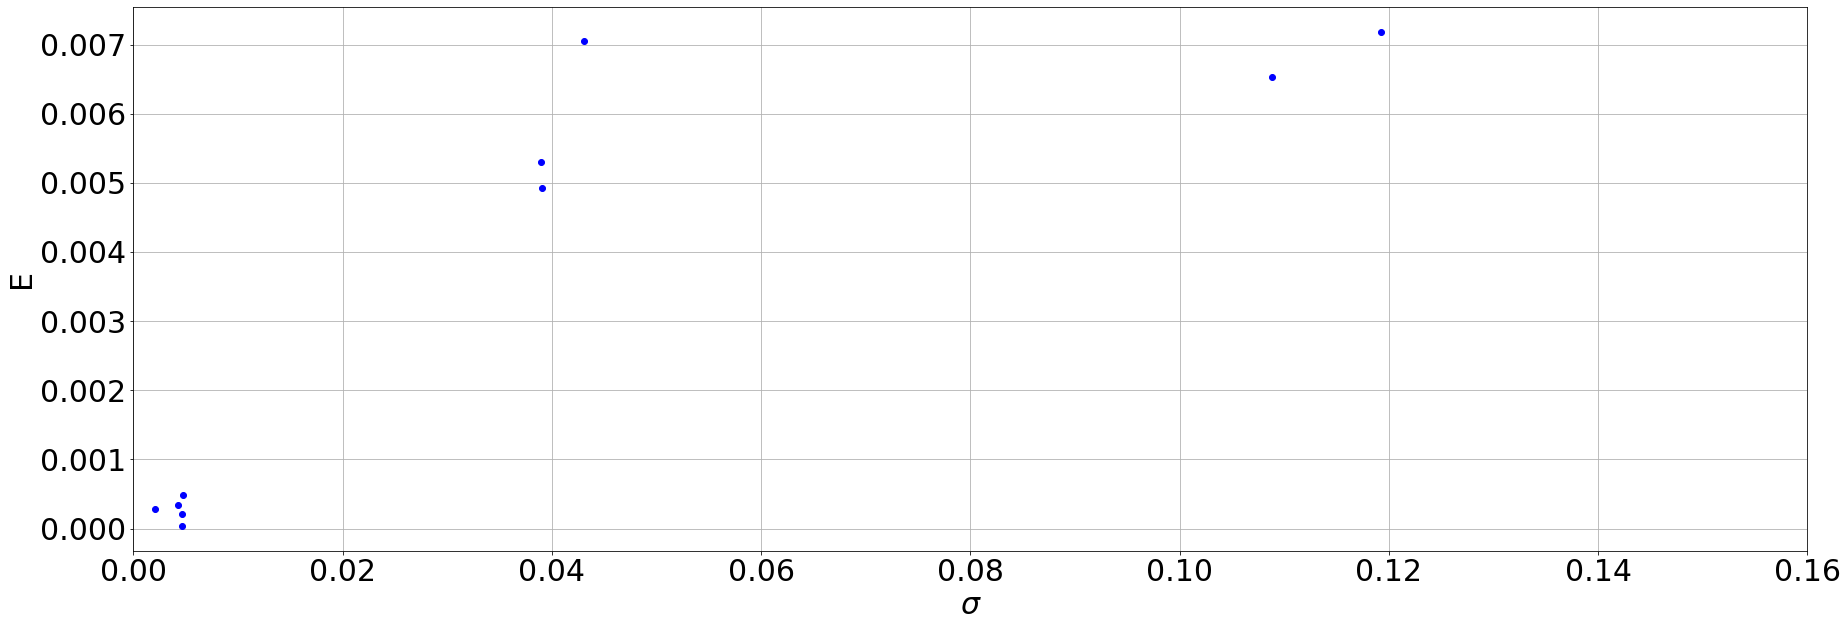

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_10_arr, mean_10_arr, 'bo')
plt.ylabel('E', size=18)
plt.xlabel('$\sigma$', size=18)
plt.xlim([0, 0.16])
plt.ylabel('E',size=30)
plt.xlabel('$\sigma$', size=30)
plt.rc('font', size=30)
plt.grid()
plt.show()

**Эффективный фронт (с короткими продажами)**

In [ ]:
sigmas_10 = []
e_10 = []
bounds = ((None, None),) 
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(profitability)
X_min_risk = optimize_portfolio(get_risk,r_matrix,mean_vec,cov_matrix,bounds)
min_risk = get_risk(X_min_risk, cov_matrix)
min_risk_preturn = np.dot(X_min_risk, mean_vec)
target = np.linspace(min_risk_preturn, 0.05, 500)
for portfolio_return in tqdm_notebook(target):
    X = optimize_portfolio(get_risk,r_matrix,mean_vec,cov_matrix,bounds, target=portfolio_return)
    sigmas_10.append(get_risk(X, cov_matrix))
    e_10.append(np.dot(X, mean_vec))

  0%|          | 0/500 [00:00<?, ?it/s]

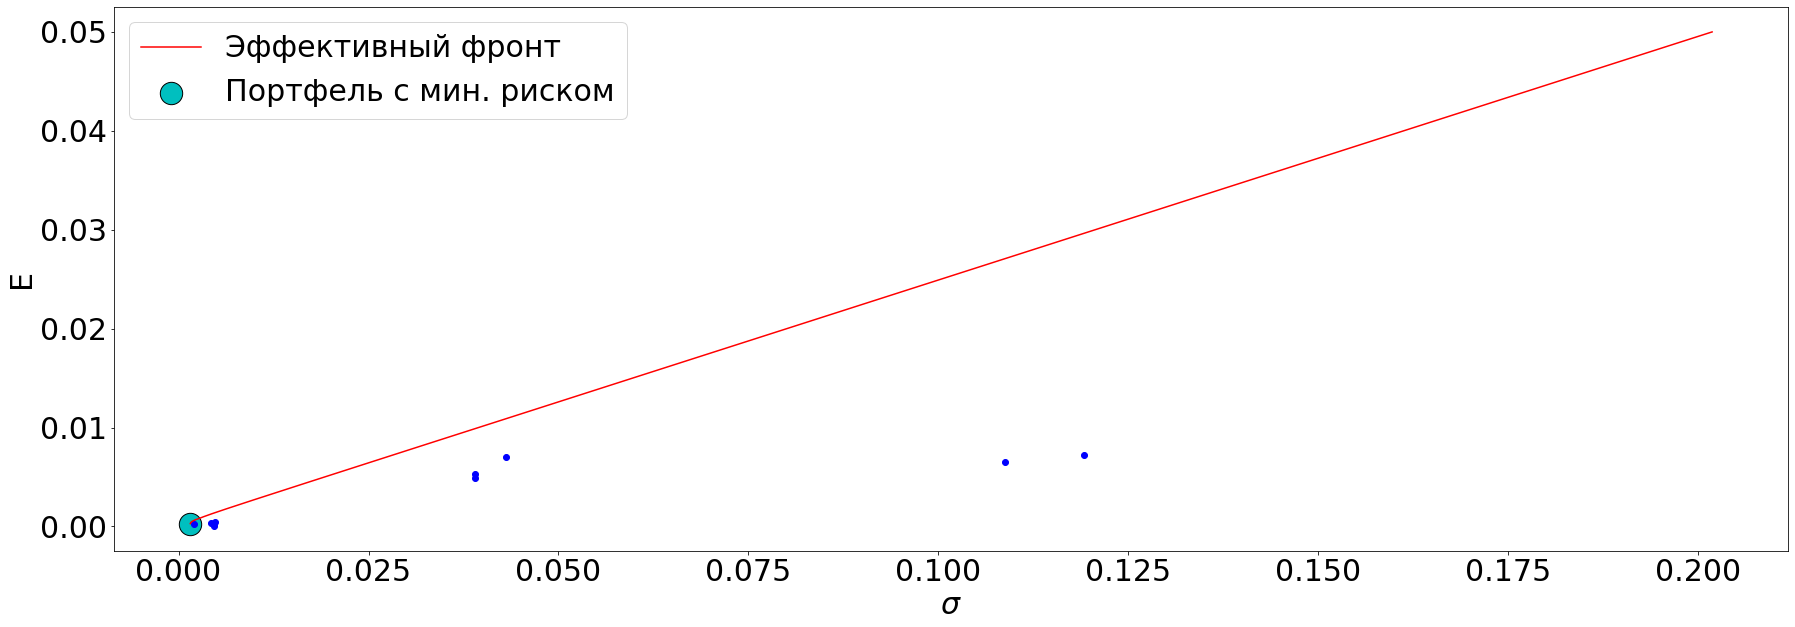

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_10_arr, mean_10_arr, 'bo')
plt.scatter(min_risk,min_risk_preturn,c='c',marker='.',s=2000,label='Портфель с мин. риском', edgecolors='black',)
plt.plot(sigmas_10, e_10, 'r-', label='Эффективный фронт')
plt.legend()
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.rc('font', size=30)
plt.show()

**Эффективный фронт (без коротких продаж)**

In [ ]:
sigmas_10_ns = []
e_10_ns = []
bounds = ((0.0, 1.0),) 
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(profitability)
X_min_risk_ns = optimize_portfolio(get_risk,r_matrix,mean_vec,cov_matrix,bounds)
min_risk_ns = get_risk(X_min_risk_ns, cov_matrix)
min_risk_preturn_ns = np.dot(X_min_risk_ns, mean_vec)
target = np.linspace(min_risk_preturn_ns, 0.1, 500)
for portfolio_return in tqdm_notebook(target):
    X_ns = optimize_portfolio(get_risk,r_matrix,mean_vec,cov_matrix,bounds, target=portfolio_return)
    sigmas_10_ns.append(get_risk(X_ns, cov_matrix))
    e_10_ns.append(np.dot(X_ns, mean_vec))

  0%|          | 0/500 [00:00<?, ?it/s]

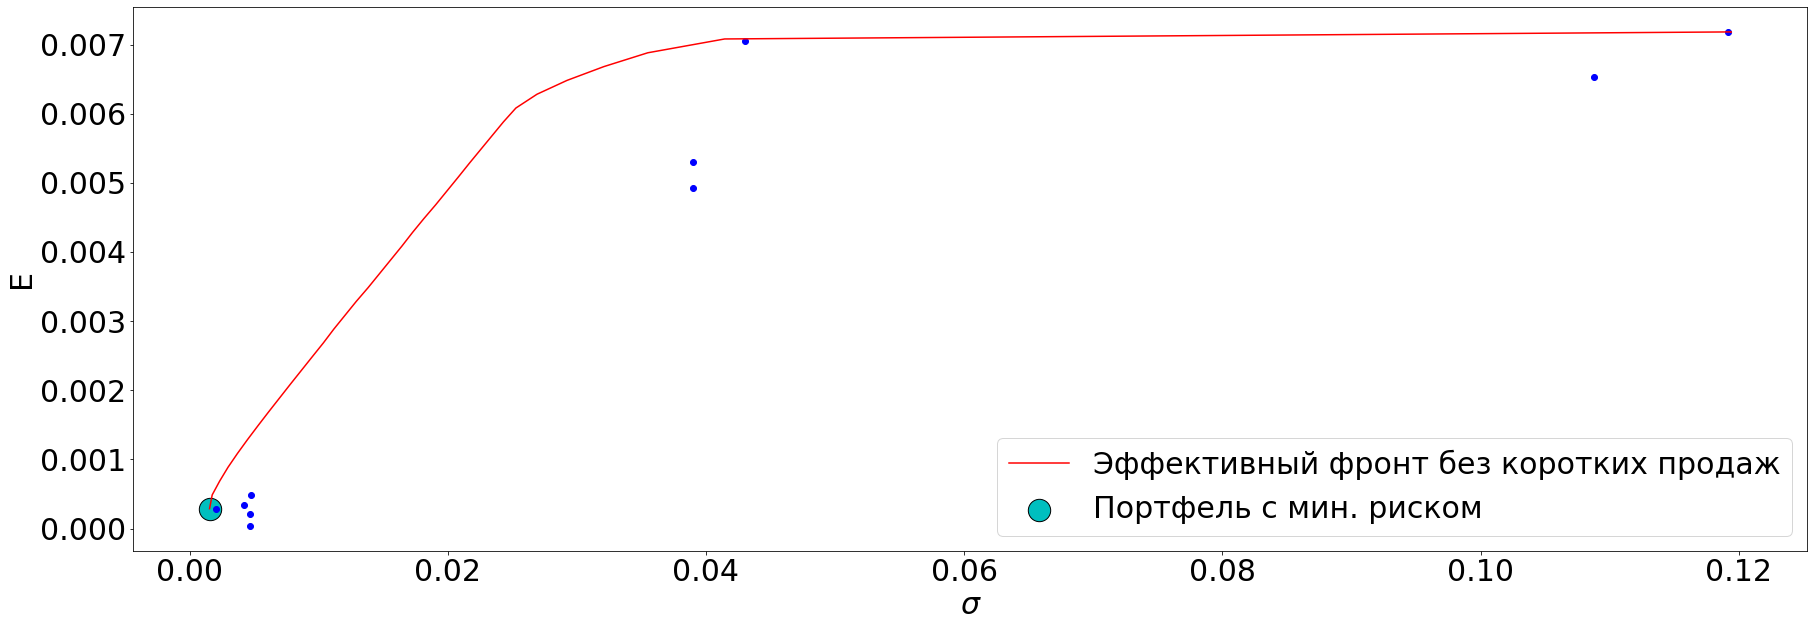

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_10_arr, mean_10_arr, 'bo')
plt.plot(sigmas_10_ns, e_10_ns, 'r-', label='Эффективный фронт без коротких продаж')
plt.scatter(min_risk_ns,min_risk_preturn_ns,c='c',marker='.',s=2000,edgecolors='black',label='Портфель с мин. риском')
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.rc('font', size=30)
plt.legend()
plt.show()

**4 эффективных фронта**

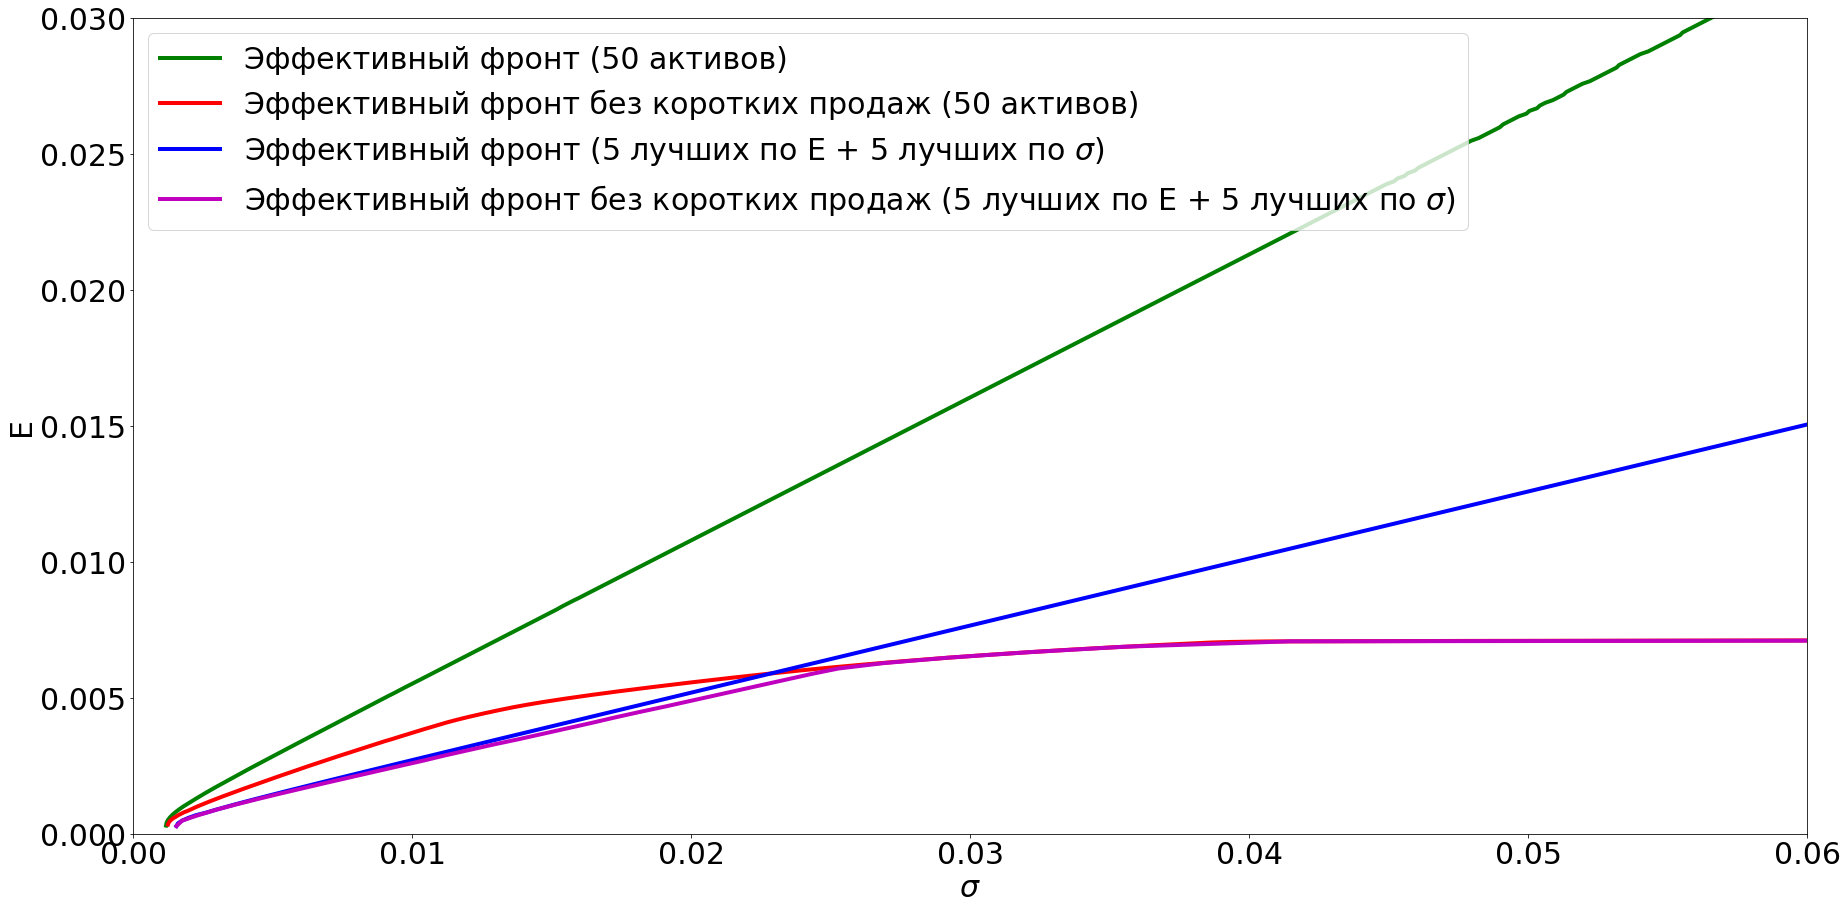

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(15)
plt.plot(sigmas, e, 'g-', linewidth=4,label='Эффективный фронт (50 активов)')
plt.plot(sigmas_ns, e_ns, 'r-', linewidth=4,label='Эффективный фронт без коротких продаж (50 активов)')
plt.plot(sigmas_10, e_10, 'b-', linewidth=4, label='Эффективный фронт (5 лучших по E + 5 лучших по $\sigma$)')
plt.plot(sigmas_10_ns, e_10_ns, 'm-', linewidth=4, label='Эффективный фронт без коротких продаж (5 лучших по E + 5 лучших по $\sigma$)')
#plt.plot(std_50_arr, mean_50_arr, 'bo')
plt.legend()
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.rc('font', size=30)
plt.xlim([0, 0.06])
plt.ylim([0, 0.03])
plt.show()

**2)10 активов, лучших по VaR характеристике ($γ$=0.95)**

In [ ]:
prof_matrix=[]
tickers_=[]
for i in range(len(profitability.columns)):
  if profitability.columns[i] in unique_50:
    tickers_.append(profitability.columns[i])
    prof_matrix.append(sorted(profitability[profitability.columns[i]].values))

In [ ]:
minus_profitability_matrix = []
for i in range(len(prof_matrix)):
  minus_profitability_matrix.append(np.multiply(prof_matrix[i],-1))

In [ ]:
observation_number = len(minus_profitability_matrix[0])
observation_number

255

In [ ]:
gamma = 0.95
num_of_risk_observations = math.floor(observation_number*(1-gamma))
num_of_risk_observations

12

In [ ]:
var_values=[]
for i in range(len(minus_profitability_matrix)):
  counter_dict = dict(Counter(minus_profitability_matrix[i]))
  counter_dict_keys = list(counter_dict.keys())
  var_value_for_ticker = -5
  j = 0
  sum = counter_dict[counter_dict_keys[0]]
  while sum/observation_number <= 1-gamma:
    j=j+1
    sum+=counter_dict[counter_dict_keys[j]]
  var_value_for_ticker = counter_dict_keys[j]
  var_values.append(var_value_for_ticker)

In [ ]:
var_dict = {tickers_[i]: var_values[i] for i in range(len(tickers_))}
var_dict_sorted = dict(sorted(var_dict.items(), key=lambda item: item[1]))

In [ ]:
unique = list(var_dict_sorted.keys())[:10]

In [ ]:
std_10var_arr = []
mean_10var_arr = []
for i in range(len(unique)):
  std_10var_arr.append(std_dict[unique[i]])
  mean_10var_arr.append(mean_dict[unique[i]])

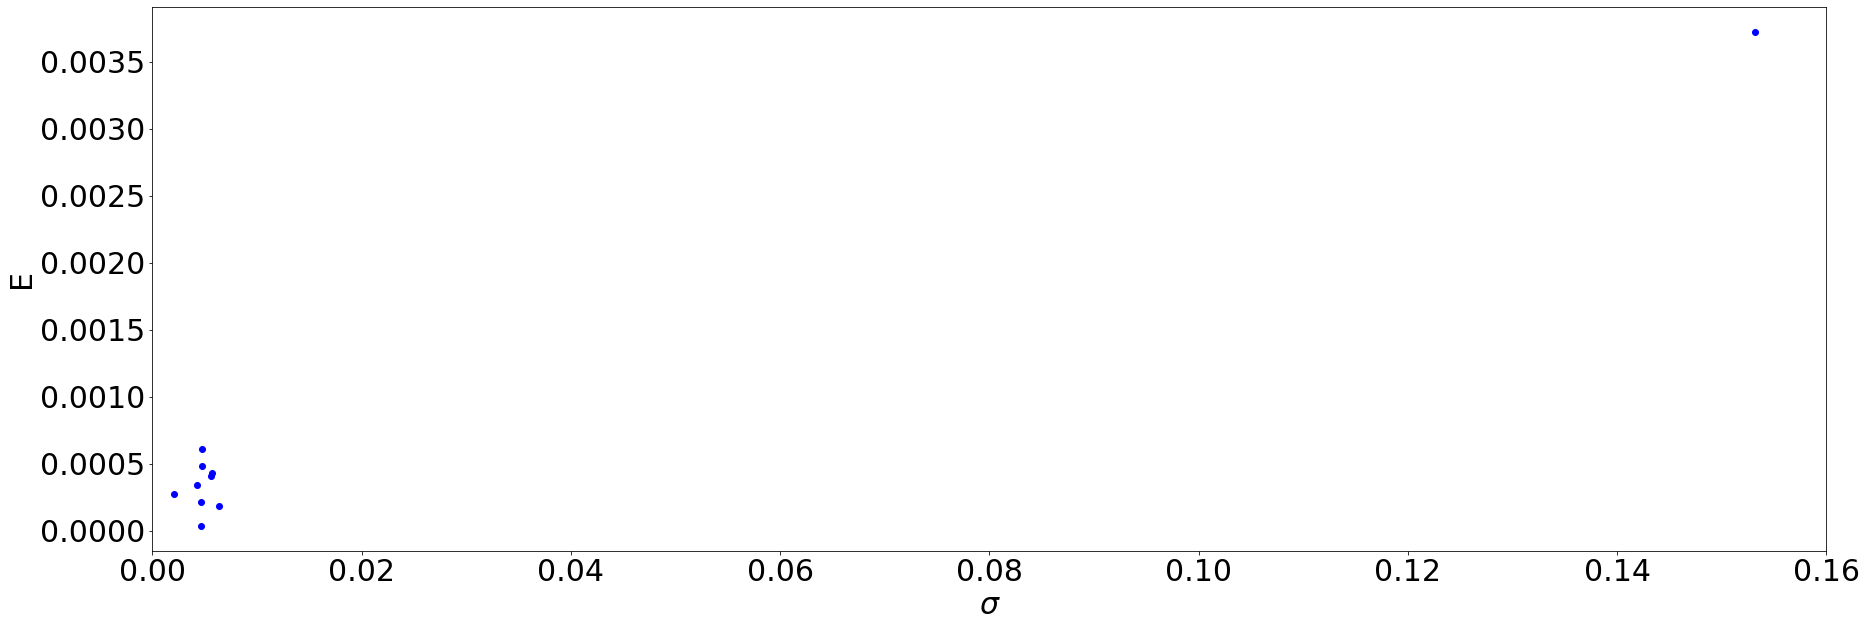

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_10var_arr, mean_10var_arr, 'bo')
plt.ylabel('E', size=18)
plt.xlabel('$\sigma$', size=18)
plt.xlim([0, 0.16])
plt.ylabel('E',size=30)
plt.xlabel('$\sigma$', size=30)
plt.rc('font', size=30)
plt.show()

**Эффективный фронт (с короткими продажами)**

In [ ]:
sigmas_10var = []
e_10var = []
bounds = ((None, None),) 
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(profitability)
X_min_risk = optimize_portfolio(get_risk,r_matrix,mean_vec,cov_matrix,bounds)
min_risk = get_risk(X_min_risk, cov_matrix)#, sqrt=True)
min_risk_preturn = np.dot(X_min_risk, mean_vec)
target = np.linspace(min_risk_preturn, 0.05, 100)
for portfolio_return in tqdm_notebook(target):
    X = optimize_portfolio(get_risk,r_matrix,mean_vec,cov_matrix,bounds, target=portfolio_return)
    sigmas_10var.append(get_risk(X, cov_matrix))#, sqrt=True))
    e_10var.append(np.dot(X, mean_vec))

  0%|          | 0/100 [00:00<?, ?it/s]

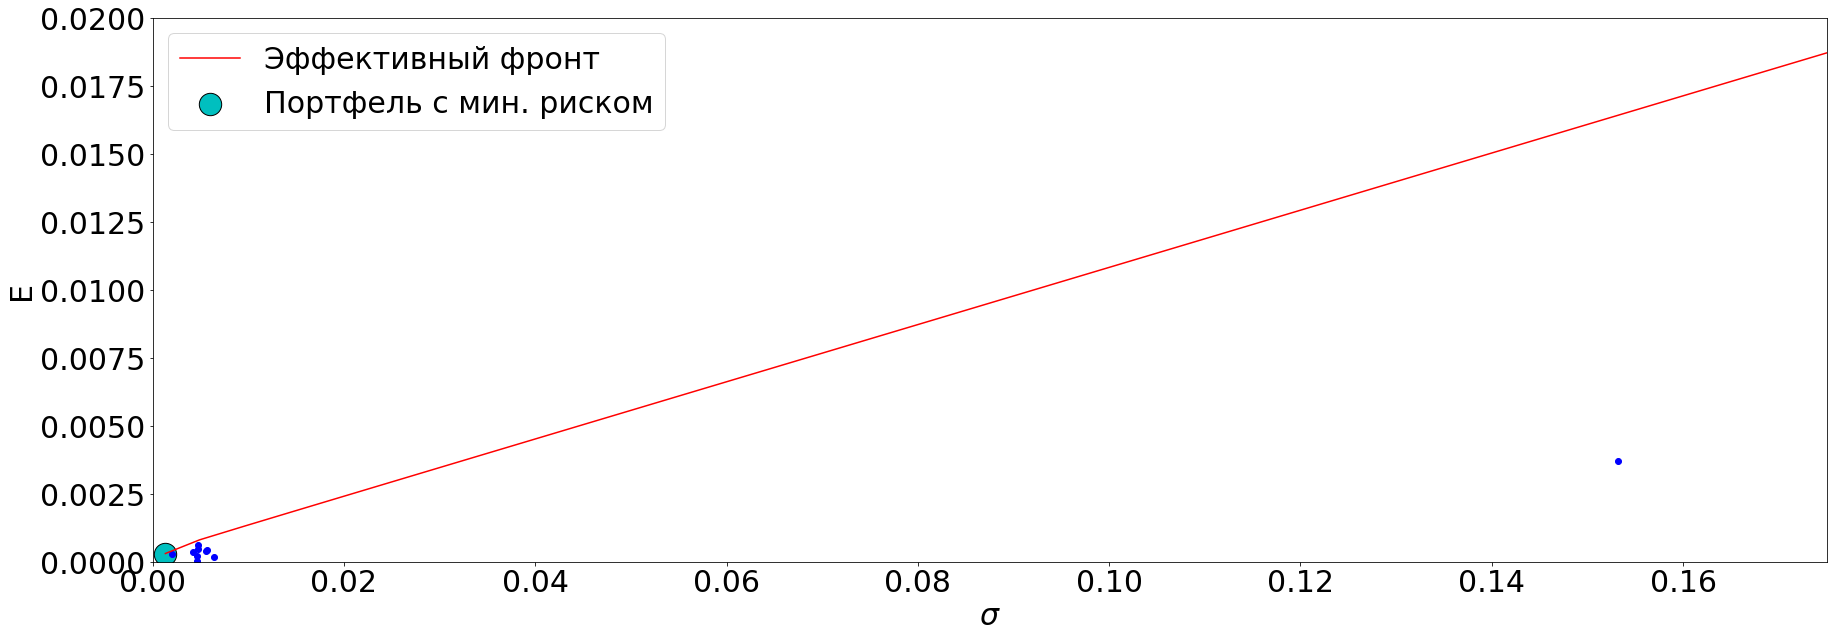

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_10var_arr, mean_10var_arr, 'bo')
plt.scatter(min_risk,min_risk_preturn,c='c',marker='.',s=2000,label='Портфель с мин. риском', edgecolors='black',)
plt.plot(sigmas_10var, e_10var, 'r-', label='Эффективный фронт')
plt.legend()
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.rc('font', size=30)
plt.ylim([0, 0.020])
plt.xlim([0, 0.175])
plt.show()

**Эффективный фронт (без коротких продаж)**

In [ ]:
sigmas_10var_ns = []
e_10var_ns = []
bounds = ((0.0, 1.0),) 
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(profitability)
X_min_risk_ns = optimize_portfolio(get_risk,r_matrix,mean_vec,cov_matrix,bounds)
min_risk_ns = get_risk(X_min_risk_ns, cov_matrix)
min_risk_preturn_ns = np.dot(X_min_risk_ns, mean_vec)
target = np.linspace(min_risk_preturn_ns, 0.01, 500)
for portfolio_return in tqdm_notebook(target):
    X_ns = optimize_portfolio(get_risk,r_matrix,mean_vec,cov_matrix,bounds, target=portfolio_return)
    sigmas_10var_ns.append(get_risk(X_ns, cov_matrix))
    e_10var_ns.append(np.dot(X_ns, mean_vec))

  0%|          | 0/500 [00:00<?, ?it/s]

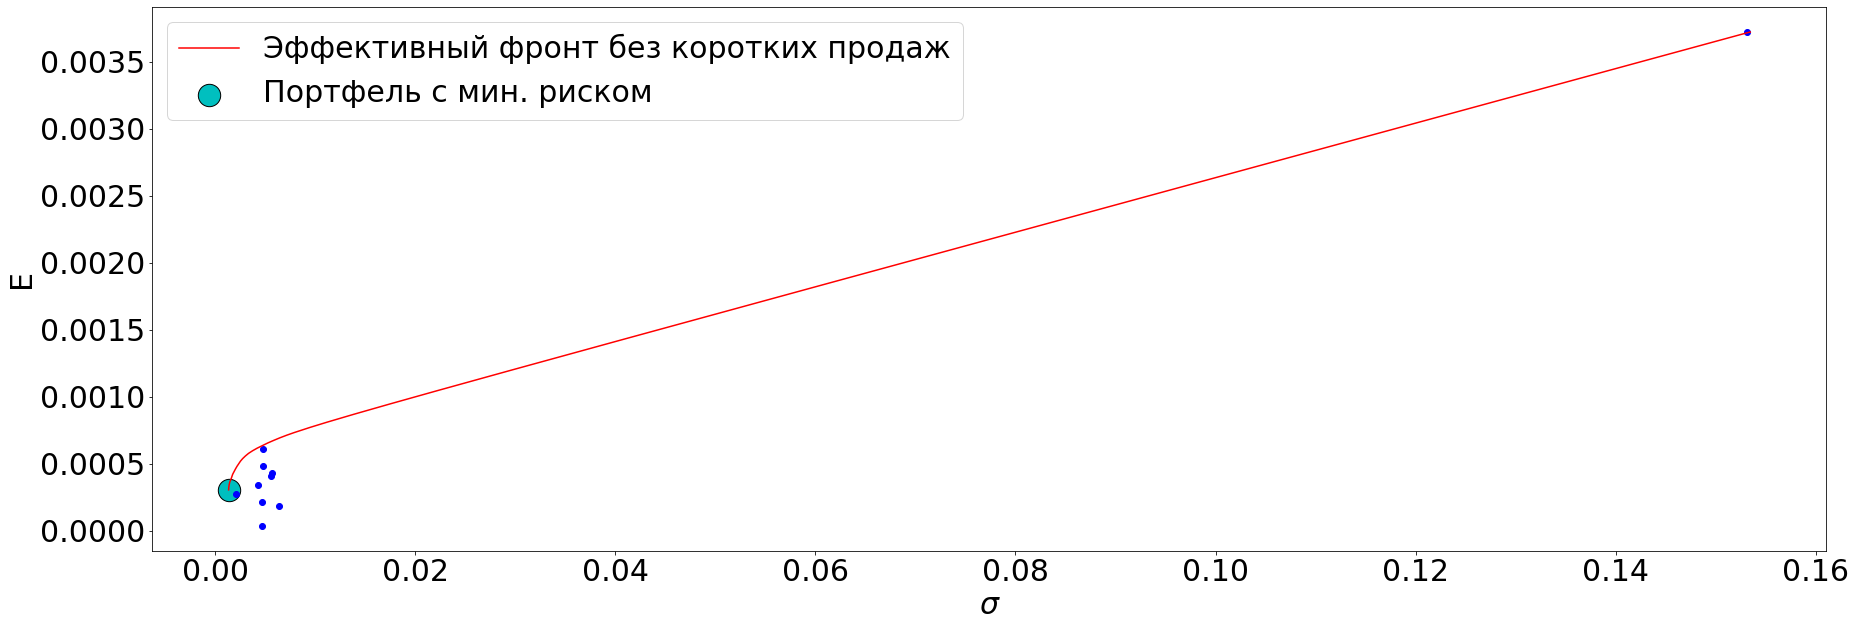

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_10var_arr, mean_10var_arr, 'bo')
plt.plot(sigmas_10var_ns, e_10var_ns, 'r-', label='Эффективный фронт без коротких продаж')
plt.scatter(min_risk_ns,min_risk_preturn_ns,c='c',marker='.',s=2000,edgecolors='black',label='Портфель с мин. риском')
plt.ylabel('E',size=30)
plt.xlabel('$\sigma$',size=30)
plt.rc('font', size=30)
plt.legend()
plt.show()

**6 эффективных фронтов**

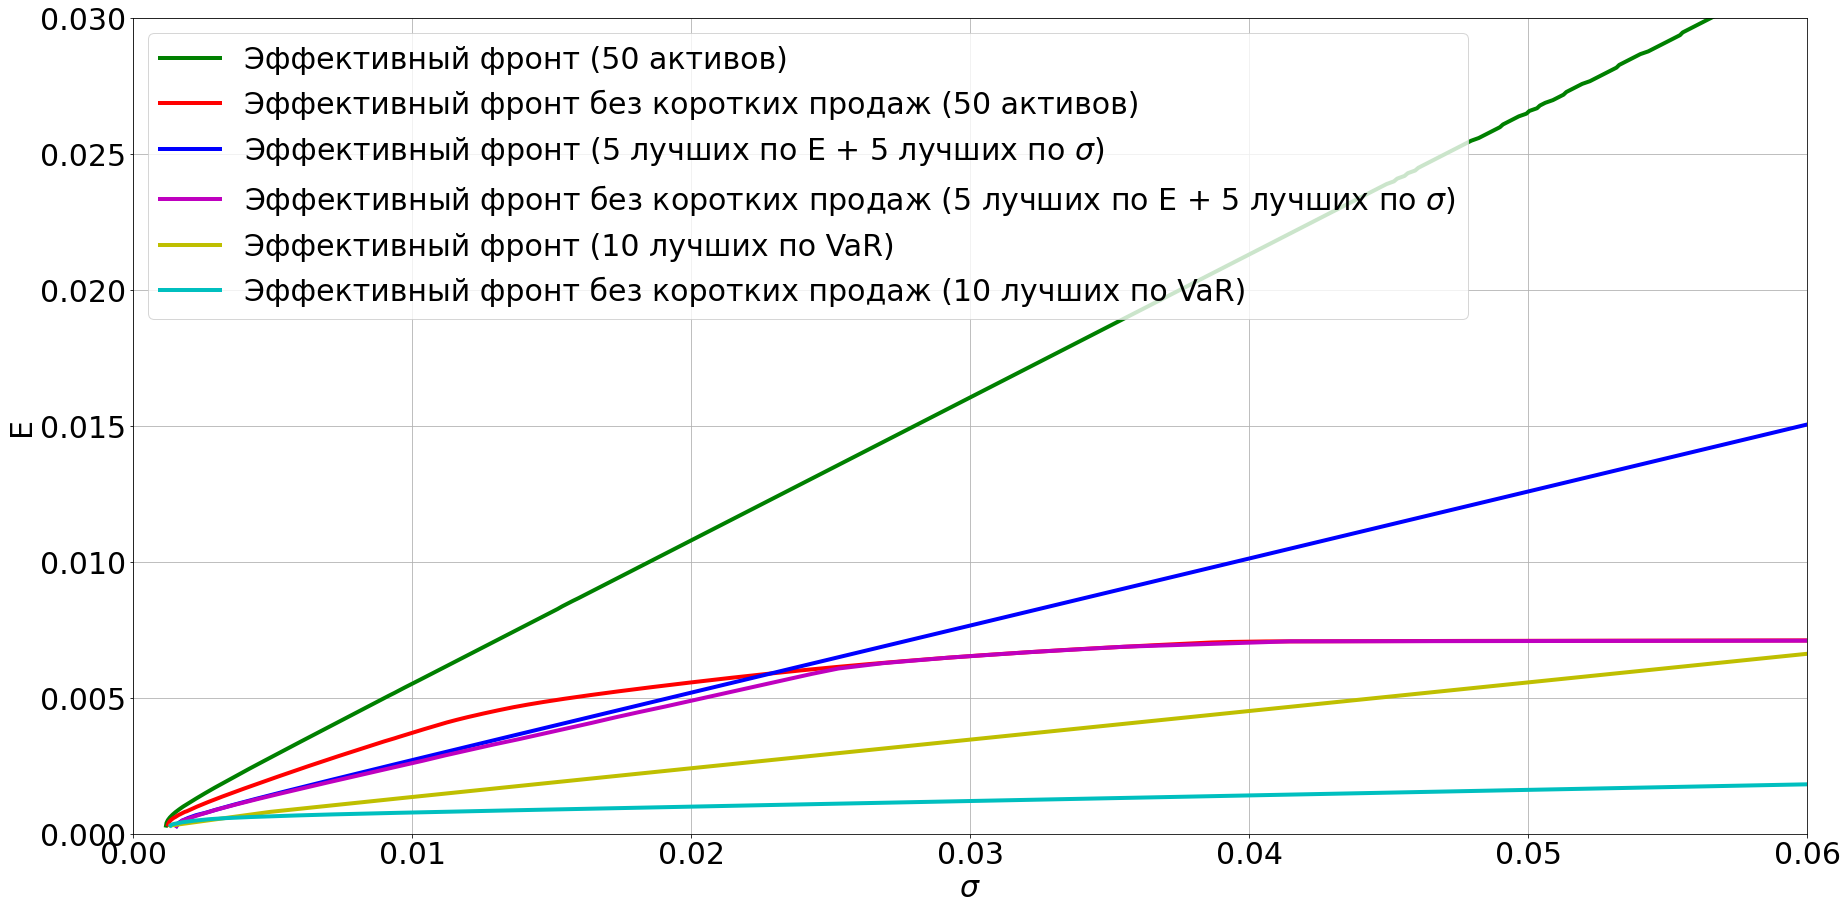

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(15)

plt.plot(sigmas, e, 'g-', linewidth=4,label='Эффективный фронт (50 активов)')
plt.plot(sigmas_ns, e_ns, 'r-', linewidth=4,label='Эффективный фронт без коротких продаж (50 активов)')
plt.plot(sigmas_10, e_10, 'b-', linewidth=4, label='Эффективный фронт (5 лучших по E + 5 лучших по $\sigma$)')
plt.plot(sigmas_10_ns, e_10_ns, 'm-', linewidth=4, label='Эффективный фронт без коротких продаж (5 лучших по E + 5 лучших по $\sigma$)')
plt.plot(sigmas_10var, e_10var, 'y-', linewidth=4, label='Эффективный фронт (10 лучших по VaR)')
plt.plot(sigmas_10var_ns, e_10var_ns, 'c-', linewidth=4, label='Эффективный фронт без коротких продаж (10 лучших по VaR)')
#plt.plot(std_50_arr, mean_50_arr, 'bo')
plt.legend()
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.rc('font', size=30)
plt.xlim([0, 0.06])
plt.ylim([0, 0.03])
plt.grid()
plt.show()

**Эффективный фронт для 50 активов без запрета на короткие продажи позволяет выбрать наилучший портфель с меньщим риском и большей доходностью по сравнению с остальными пятью эффективными фронтами. При условии запрета на короткие продажи эффективный фронт для 50 активов дает лучшие результаты только при риске до 0.025, при большем риске он уступает эффективному фронту без ограничений для 10 активов (5 лучших по E + 5 лучших по $\sigma$) и совпадает с эффективным фронтом для тех же 10 активов, но с запретом на короткие продажи.**

##**3.Risk aversion**

##**$E(x)-\gamma\sigma(x)→max$**

**Sequential Least SQuares Programming optimizer**

In [ ]:
from scipy import stats
unique=unique_50
def objective_function(X, returns, risk_level, cov_matrix):
    return - np.dot(returns, X) + risk_level * get_risk(X, cov_matrix)
def optimize_risk_aversion_portfolio(objective_function, returns, cov_matrix, risk_level, bounds, N):
    X = np.ones(N)
    X = X / X.sum()
    bounds = bounds * N
    constraints=[]
    constraints.append({'type': 'eq', 'fun': lambda X: np.sum(X) - 1.0})
    return minimize(objective_function,X,args=(returns, risk_level, cov_matrix), method='SLSQP',constraints=constraints,bounds=bounds).x
def risk_aversion_computing(means, risk_levels, short=True):
    min_risk, min_risk_preturn = [], []
    N = len(means)
    E = means
    r_matrix, mean_vec, cov_matrix = get_return_mean_cov(means)
    X_min_risks = []
    bounds = ((-1, 1),) if short else ((0, 1),)
    for risk_level in risk_levels:
        X_min_risk = optimize_risk_aversion_portfolio(objective_function, E, cov_matrix,risk_level, bounds, N)
        min_risk.append(get_risk(X_min_risk, cov_matrix))
        min_risk_preturn.append(np.dot(X_min_risk, E))
        X_min_risks.append(X_min_risk)
    return min_risk, min_risk_preturn, X_min_risks

**Без ограничения на короткие продажи**

In [ ]:
min_risk, min_risk_preturn = [], []
min_risk, min_risk_preturn, X_mins_ = risk_aversion_computing(mean_50_arr, np.linspace(1, 4, 4), True)

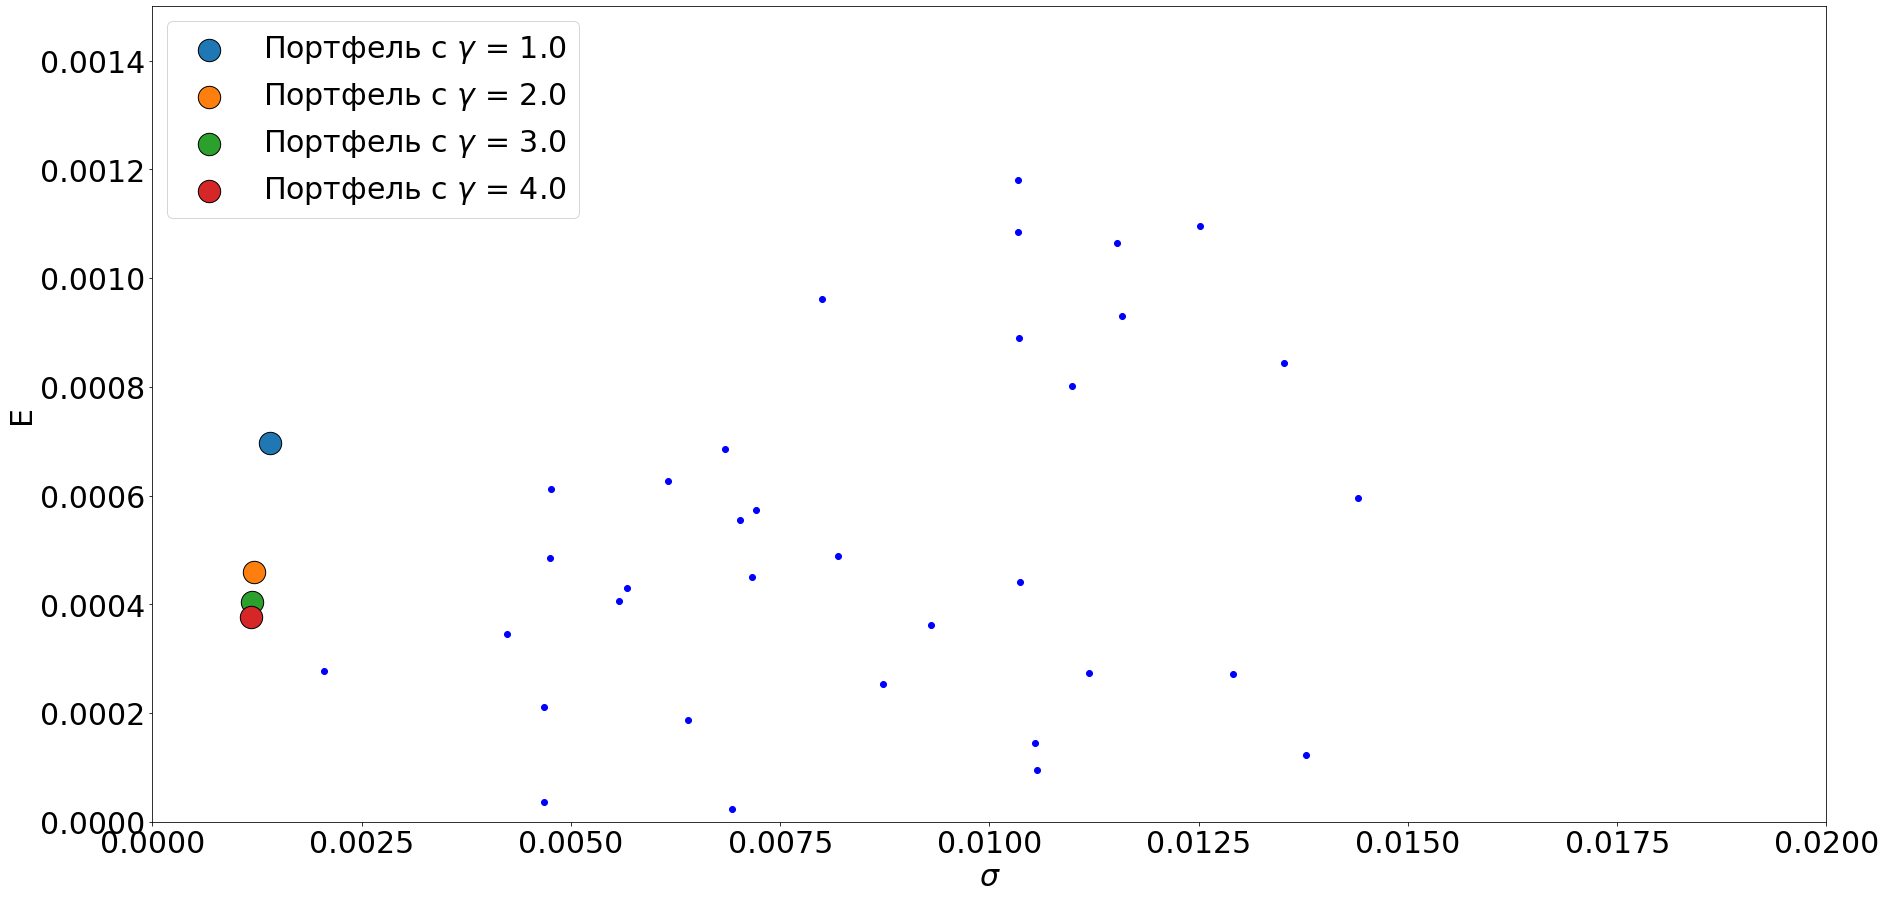

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(15)
plt.plot(std_50_arr, mean_50_arr, 'bo')
for ind, risk_level in enumerate(np.linspace(1, 4, 4)):
        plt.scatter(min_risk[ind], min_risk_preturn[ind],
                marker='.', s=2000, edgecolors='black', label = 'Портфель с $\gamma$ = '+str(risk_level))
plt.legend()
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.rc('font', size=30)
plt.xlim([0, 0.020])
plt.ylim([0, 0.0015])
plt.show()

In [ ]:
prof_matrix=[]
tickers_=[]
for i in range(len(profitability.columns)):
  if profitability.columns[i] in unique_50:
    tickers_.append(profitability.columns[i])
    prof_matrix.append(sorted(profitability[profitability.columns[i]].values))

In [ ]:
prof_opt_portfolio = []
time = []
for i in range(len(X_mins_)):
  for k in range(len(prof_matrix[0])):
    sum = 0
    for j in range(len(X_mins_[i])):
      sum += prof_matrix[j][k] * X_mins_[i][j]
    time.append(sum)
  prof_opt_portfolio.append(time)
  time = []

In [ ]:
minus_profitability_matrix = []
for i in range(len(prof_opt_portfolio)):
  minus_profitability_matrix.append(np.multiply(prof_opt_portfolio[i],-1))

In [ ]:
observation_number = len(minus_profitability_matrix[0])
observation_number

255

In [ ]:
gamma = 0.95
num_of_risk_observations = math.floor(observation_number*(1-gamma))
num_of_risk_observations

12

In [ ]:
var_values=[]
for i in range(len(minus_profitability_matrix)):
  counter_dict = dict(Counter(minus_profitability_matrix[i]))
  counter_dict_keys = list(counter_dict.keys())
  var_value_for_ticker = -5
  j = 0
  sum = counter_dict[counter_dict_keys[0]]
  while sum/observation_number <= 1-gamma:
    j=j+1
    sum+=counter_dict[counter_dict_keys[j]]
  var_value_for_ticker = counter_dict_keys[j]
  var_values.append(var_value_for_ticker)

**VaR значения для портфелей**

In [ ]:
for i in range(len(var_values)):
  print('VaR for portfolio with risk aversion = ' + str(i+1) + ': ' + str(var_values[i]))

VaR for portfolio with risk aversion = 1: 0.01876557162519089
VaR for portfolio with risk aversion = 2: 0.01892701636998
VaR for portfolio with risk aversion = 3: 0.018998861822887785
VaR for portfolio with risk aversion = 4: 0.019021482902525592


**Характеристика портфелей**

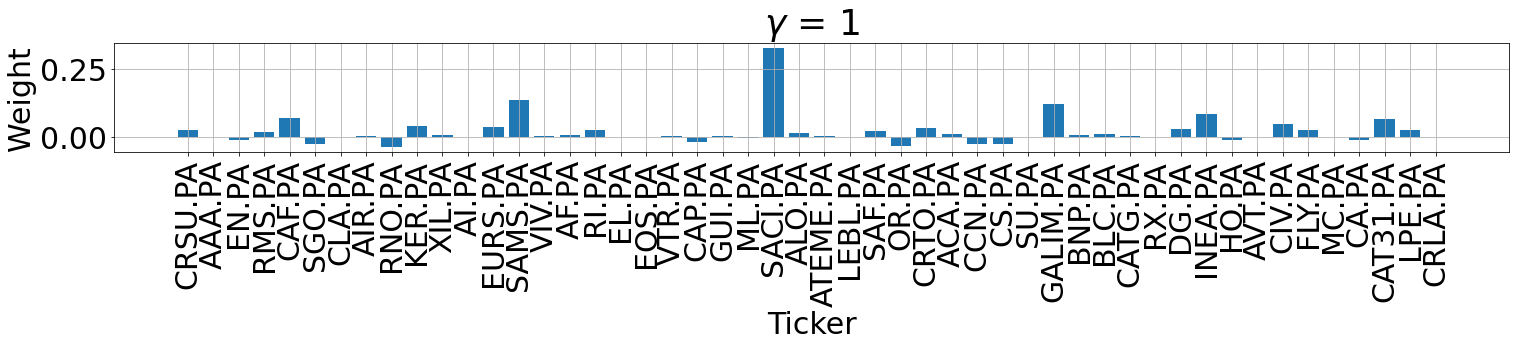

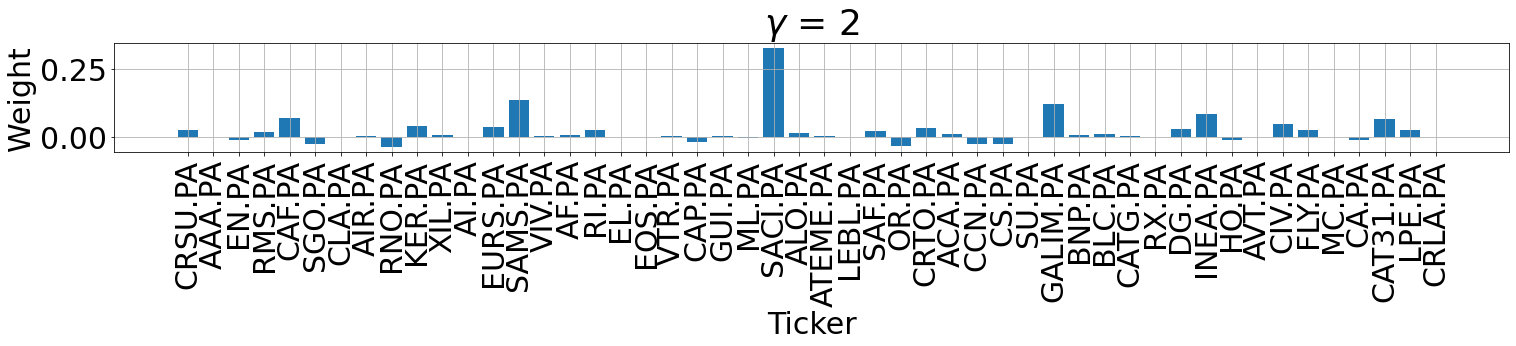

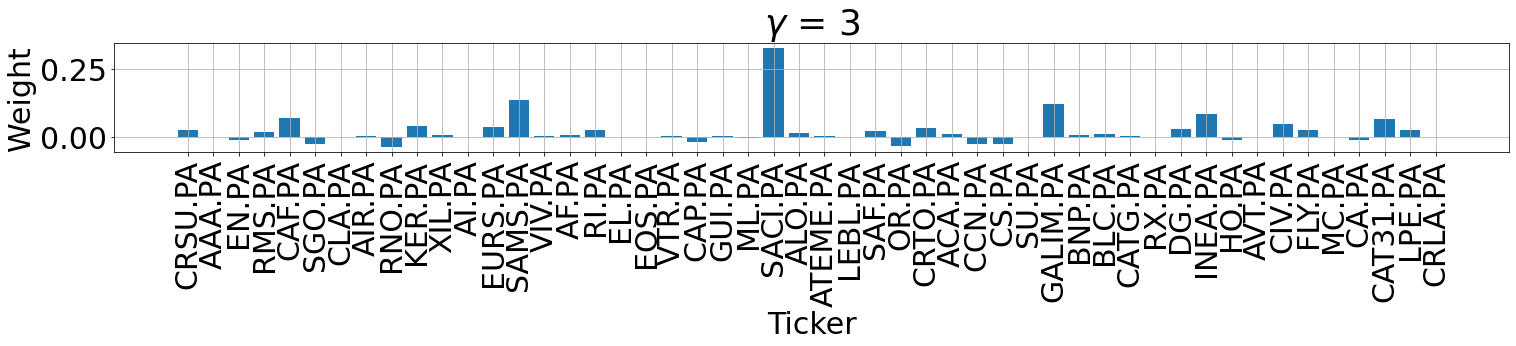

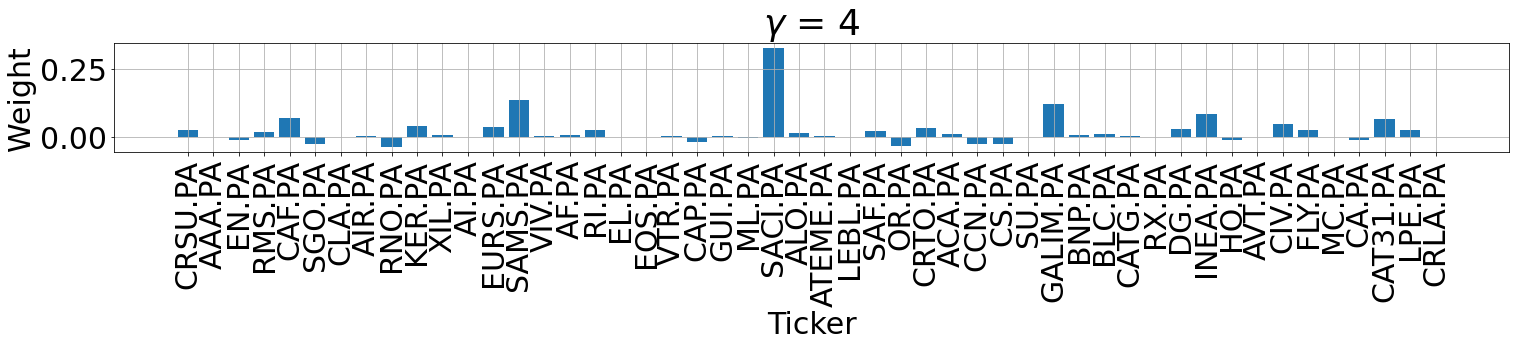

In [ ]:
def plot_weights_histogram(weights, data, ra, ra_ind=True):
    plt.figure(figsize=(25,2))
    x_values = data
    x = np.arange(len(weights))
    plt.xlabel('Ticker')
    plt.ylabel('Weight')
    height = weights
    plt.bar(x, height=height)
    plt.xticks(x, x_values, rotation='90')
    if ra_ind:
      plt.title('$\gamma$ = ' + str(ra))
    plt.grid()
for i in range(len(X_mins_)):
  plot_weights_histogram(X_mins_[0], unique_50, i+1)

**С ограничением на короткие продажи**

In [ ]:
min_risk, min_risk_preturn = [], []
min_risk, min_risk_preturn, X_mins_ = risk_aversion_computing(mean_50_arr, np.linspace(1, 4, 4), False)

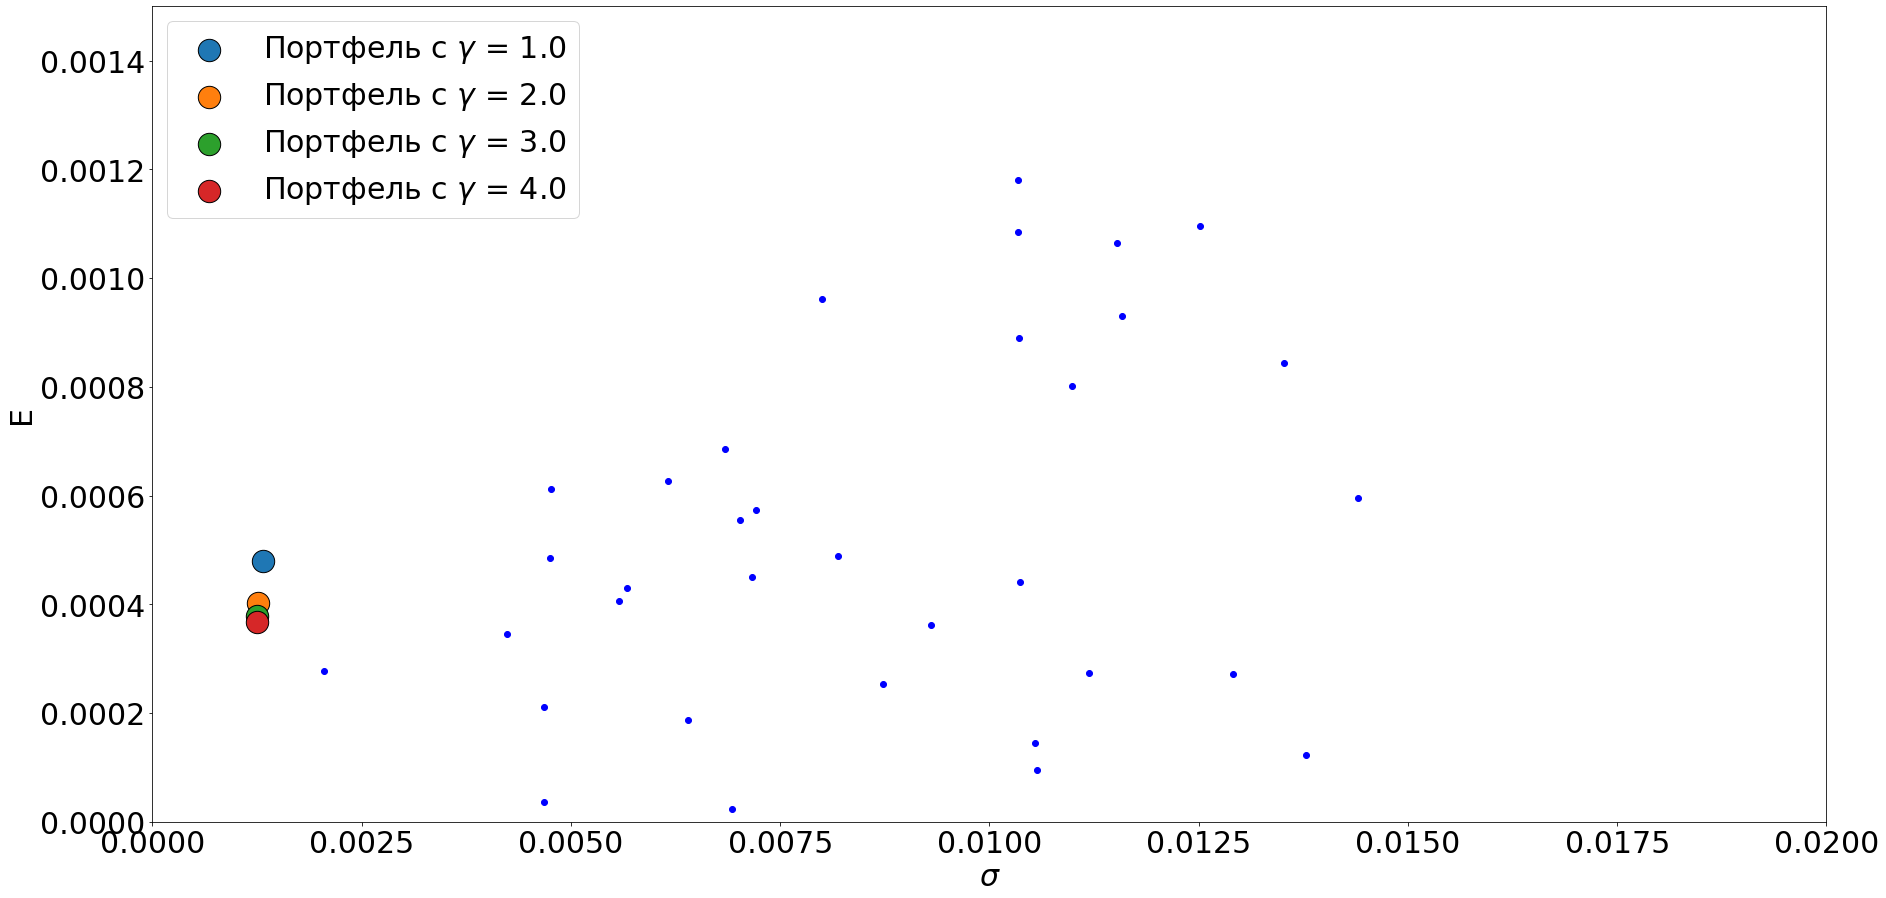

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(15)
plt.plot(std_50_arr, mean_50_arr, 'bo')
for ind, risk_level in enumerate(np.linspace(1, 4, 4)):
        plt.scatter(min_risk[ind], min_risk_preturn[ind],
                marker='.', s=2000, edgecolors='black', label = 'Портфель с $\gamma$ = '+str(risk_level))
plt.legend()
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.rc('font', size=30)
plt.xlim([0, 0.020])
plt.ylim([0, 0.0015])
plt.show()

In [ ]:
prof_matrix=[]
tickers_=[]
for i in range(len(profitability.columns)):
  if profitability.columns[i] in unique_50:
    tickers_.append(profitability.columns[i])
    prof_matrix.append(sorted(profitability[profitability.columns[i]].values))
prof_opt_portfolio = []
time = []
for i in range(len(X_mins_)):
  for k in range(len(prof_matrix[0])):
    sum = 0
    for j in range(len(X_mins_[i])):
      sum += prof_matrix[j][k] * X_mins_[i][j]
    time.append(sum)
  prof_opt_portfolio.append(time)
  time = []
minus_profitability_matrix = []
for i in range(len(prof_opt_portfolio)):
  minus_profitability_matrix.append(np.multiply(prof_opt_portfolio[i],-1))
var_values=[]
for i in range(len(minus_profitability_matrix)):
  counter_dict = dict(Counter(minus_profitability_matrix[i]))
  counter_dict_keys = list(counter_dict.keys())
  var_value_for_ticker = -5
  j = 0
  sum = counter_dict[counter_dict_keys[0]]
  while sum/observation_number <= 1-gamma:
    j=j+1
    sum+=counter_dict[counter_dict_keys[j]]
  var_value_for_ticker = counter_dict_keys[j]
  var_values.append(var_value_for_ticker)

**VaR значения для портфелей**

In [ ]:
for i in range(len(var_values)):
  print('VaR for portfolio with risk aversion = ' + str(i+1) + ': ' + str(var_values[i]))

VaR for portfolio with risk aversion = 1: 0.019014406806759497
VaR for portfolio with risk aversion = 2: 0.01900127775076524
VaR for portfolio with risk aversion = 3: 0.019117730688920254
VaR for portfolio with risk aversion = 4: 0.019052317038808577


**Характеристика портфелей**

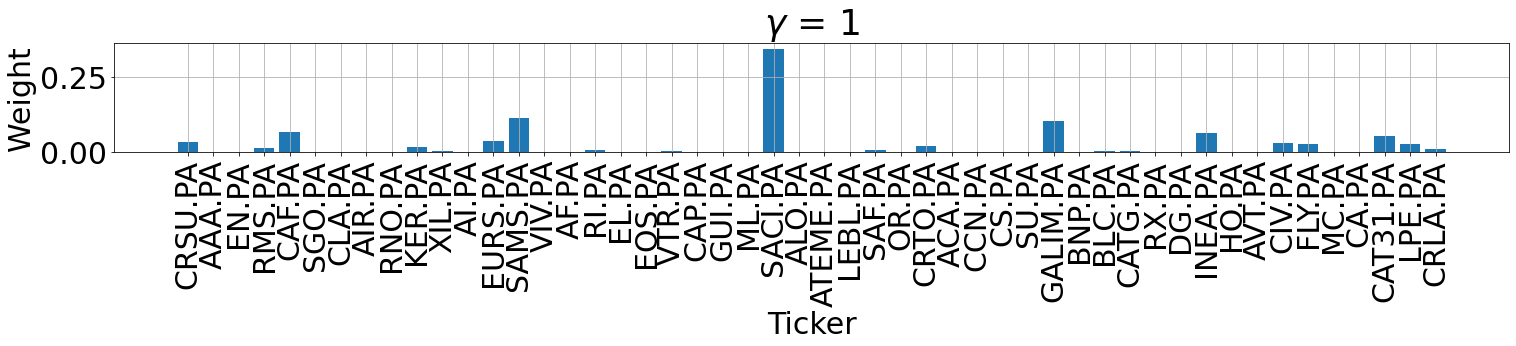

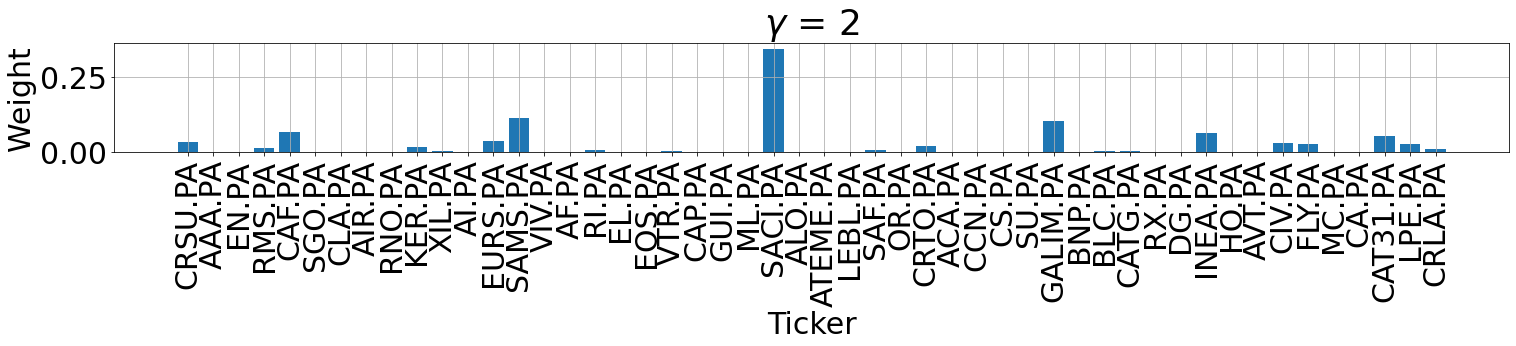

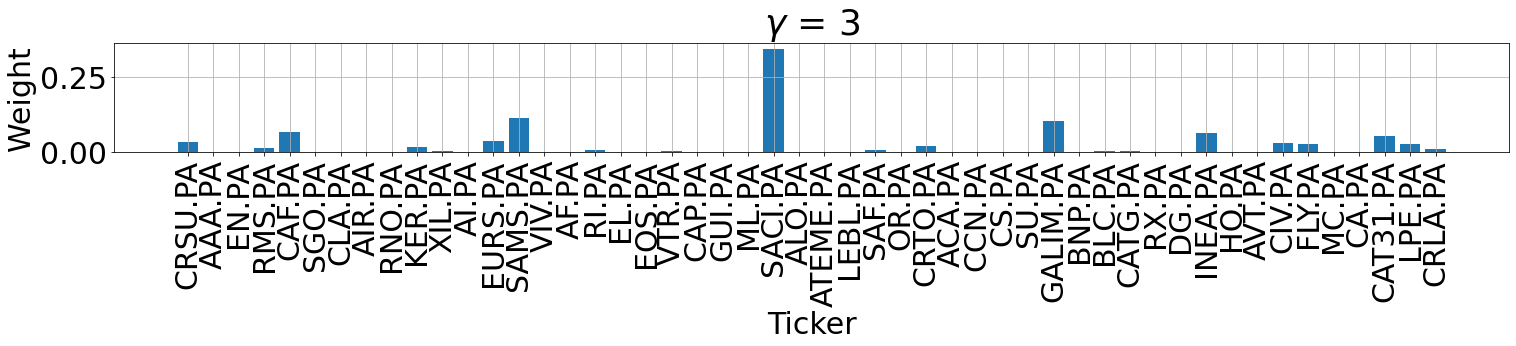

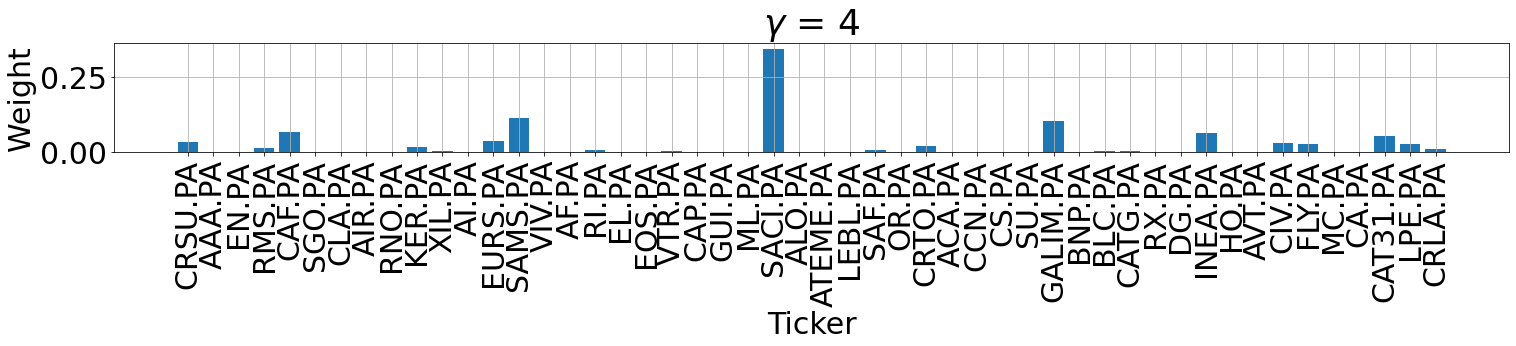

In [ ]:
for i in range(len(X_mins_)):
  plot_weights_histogram(X_mins_[0], unique_50, i+1)

**Наибольшее значение $\gamma$ дает портфель с наименьшим риском, однако при $\gamma=1$ портфель имеет заметно большую среднюю доходность, чем портфели с $\gamma=$ 2 или 3 или 4. Это утверждение справедливо для портфелей без запрета на короткие продажи и c таким ограничением. Однако без запрета на короткие продажи можно получить портфель с большей доходностью при том же отношении к риску.**

**Заметим, что и в случае с запретом коротких продаж, и в случае без такого ограничения, актив SACI.PA (Fiducial Office Solutions, distributes office supplies and offers printing services to businesses) имеет наибольшие доли во всех портфелях. В предыдущей лабораторной работе мы выяснили, что этот актив является наименее рисковым среди всех активов за 2017 год на французском рынке.**

##**4.Risk aversion and Portfolio selection**

**10 лучших по VaR активов (GALIM.PA, SACI.PA,SAMS.PA,LEBL.PA,INEA.PA,
EURS.PA,CAT31.PA,CAF.PA,CRLA.PA,CRSU.PA)**

In [ ]:
unique = list(var_dict_sorted.keys())[:10]

**Без ограничений на короткие продажи**

In [ ]:
min_risk, min_risk_preturn = [], []
min_risk, min_risk_preturn, X_mins_ = risk_aversion_computing(mean_10var_arr, np.linspace(1, 4, 4), True)

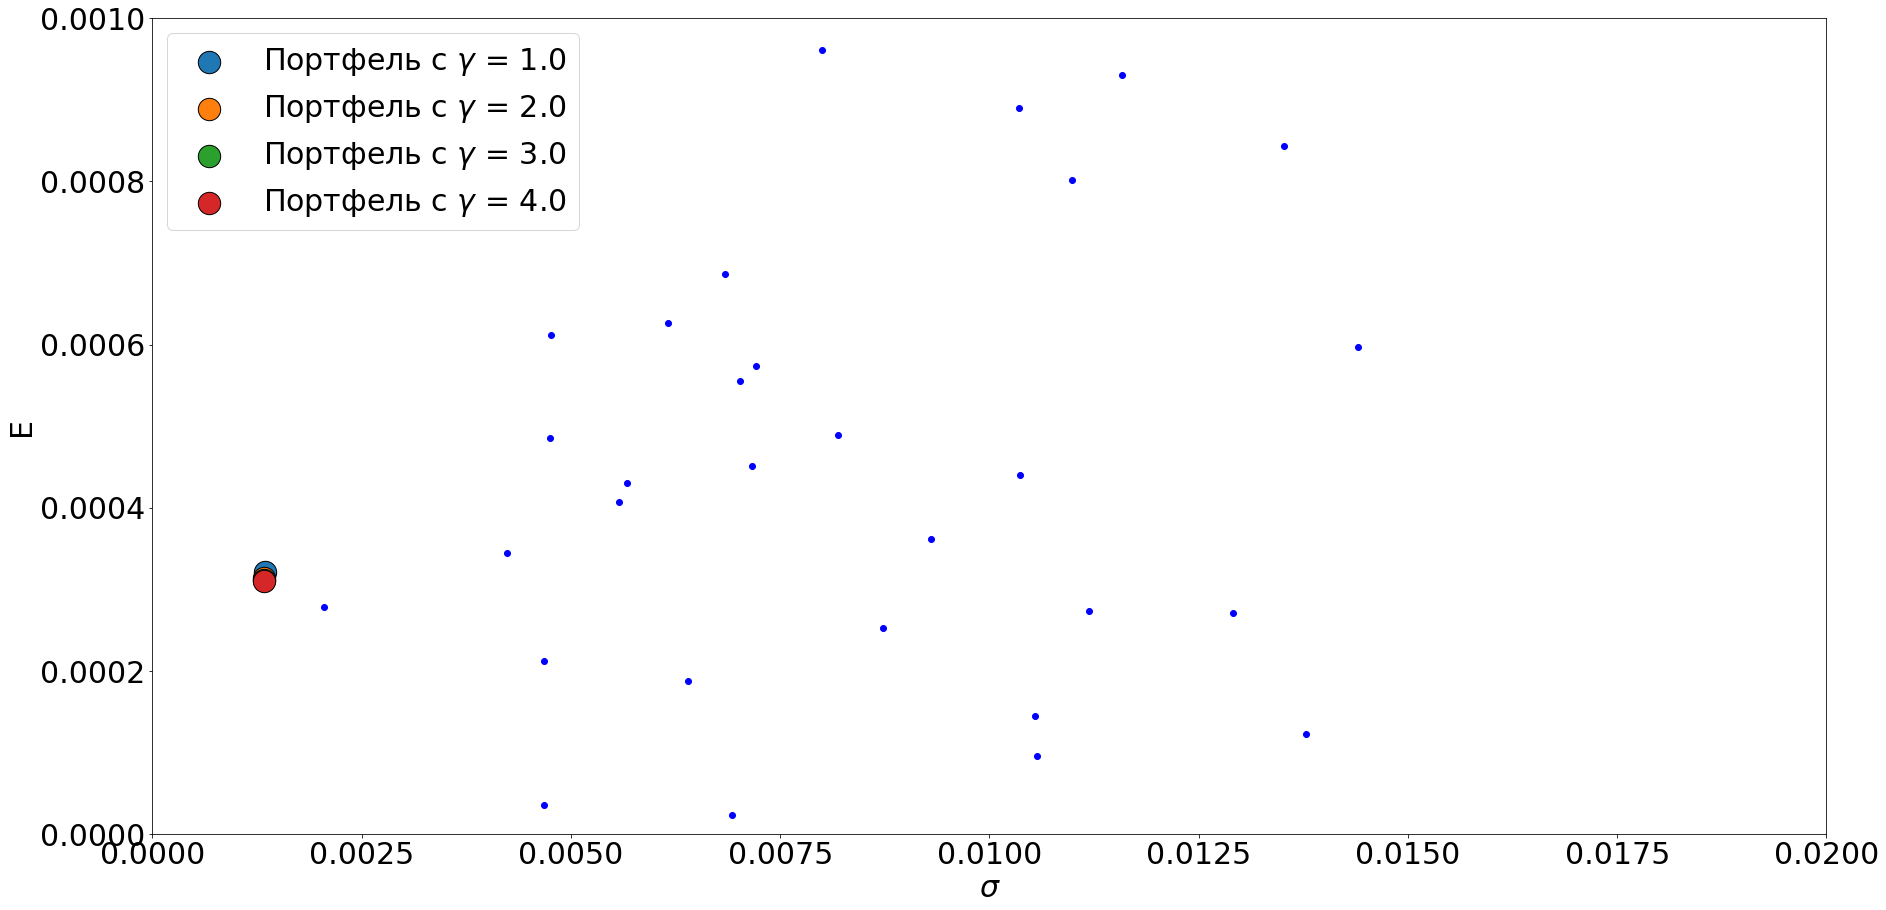

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(15)
plt.plot(std_50_arr, mean_50_arr, 'bo')
for ind, risk_level in enumerate(np.linspace(1, 4, 4)):
        plt.scatter(min_risk[ind], min_risk_preturn[ind],
                marker='.', s=2000, edgecolors='black', label = 'Портфель с $\gamma$ = '+str(risk_level))
plt.legend()
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.rc('font', size=30)
plt.xlim([0, 0.020])
plt.ylim([0, 0.001])
plt.show()

In [ ]:
prof_matrix=[]
tickers_=[]
for i in range(len(profitability.columns)):
  if profitability.columns[i] in unique:
    tickers_.append(profitability.columns[i])
    prof_matrix.append(sorted(profitability[profitability.columns[i]].values))
prof_opt_portfolio = []
time = []
for i in range(len(X_mins_)):
  for k in range(len(prof_matrix[0])):
    sum = 0
    for j in range(len(X_mins_[i])):
      sum += prof_matrix[j][k] * X_mins_[i][j]
    time.append(sum)
  prof_opt_portfolio.append(time)
  time = []
minus_profitability_matrix = []
for i in range(len(prof_opt_portfolio)):
  minus_profitability_matrix.append(np.multiply(prof_opt_portfolio[i],-1))
var_values=[]
for i in range(len(minus_profitability_matrix)):
  counter_dict = dict(Counter(minus_profitability_matrix[i]))
  counter_dict_keys = list(counter_dict.keys())
  var_value_for_ticker = -5
  j = 0
  sum = counter_dict[counter_dict_keys[0]]
  while sum/observation_number <= 1-gamma:
    j=j+1
    sum+=counter_dict[counter_dict_keys[j]]
  var_value_for_ticker = counter_dict_keys[j]
  var_values.append(var_value_for_ticker)

**VaR  значения для портфелей**

In [ ]:
for i in range(len(var_values)):
  print('VaR for portfolio with risk aversion = ' + str(i+1) + ': ' + str(var_values[i]))

VaR for portfolio with risk aversion = 1: 0.006457712586816741
VaR for portfolio with risk aversion = 2: 0.006407272231621552
VaR for portfolio with risk aversion = 3: 0.006383256538060857
VaR for portfolio with risk aversion = 4: 0.006386342539154066


**Характеристика портфелей**

In [ ]:
X_mins_[1][3]

-0.000222690406852672

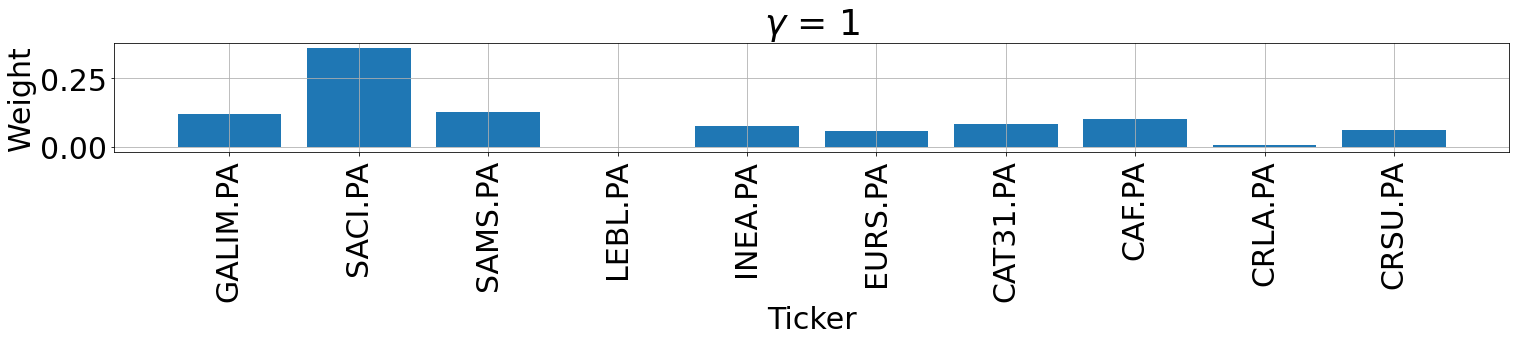

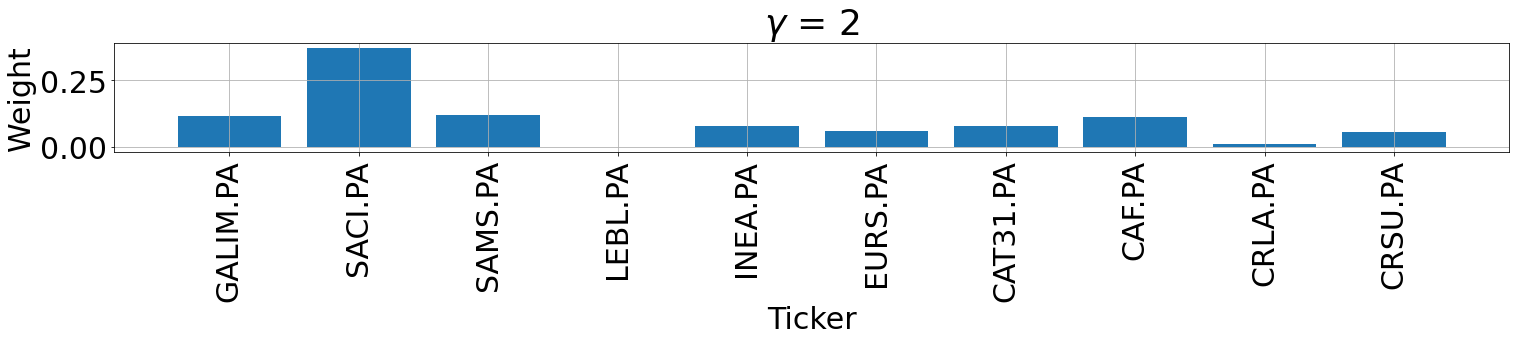

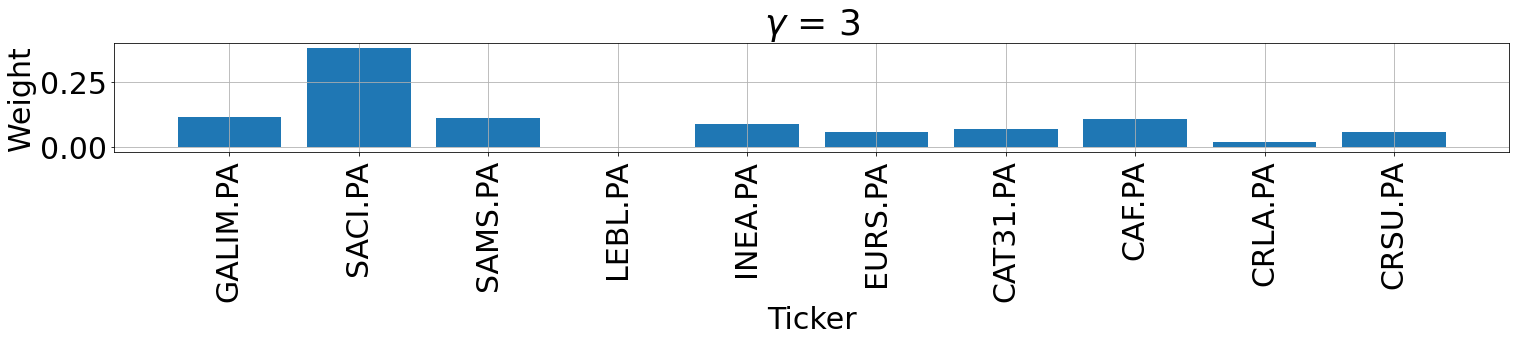

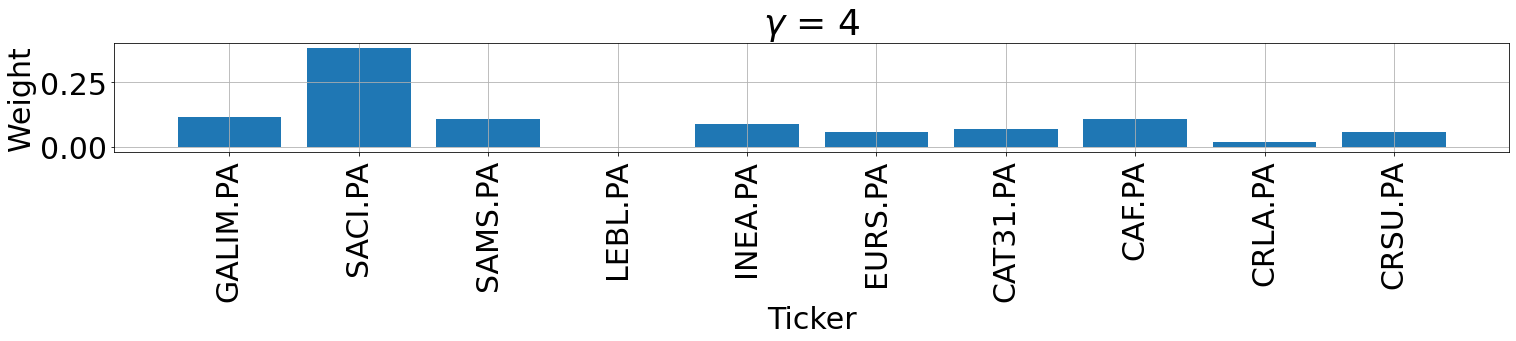

In [ ]:
for i in range(len(X_mins_)):
  plot_weights_histogram(X_mins_[i], unique, i+1)

**С запретом на короткие продажи**

In [ ]:
min_risk, min_risk_preturn = [], []
min_risk, min_risk_preturn, X_mins_ = risk_aversion_computing(mean_10var_arr, np.linspace(1, 4, 4), False)

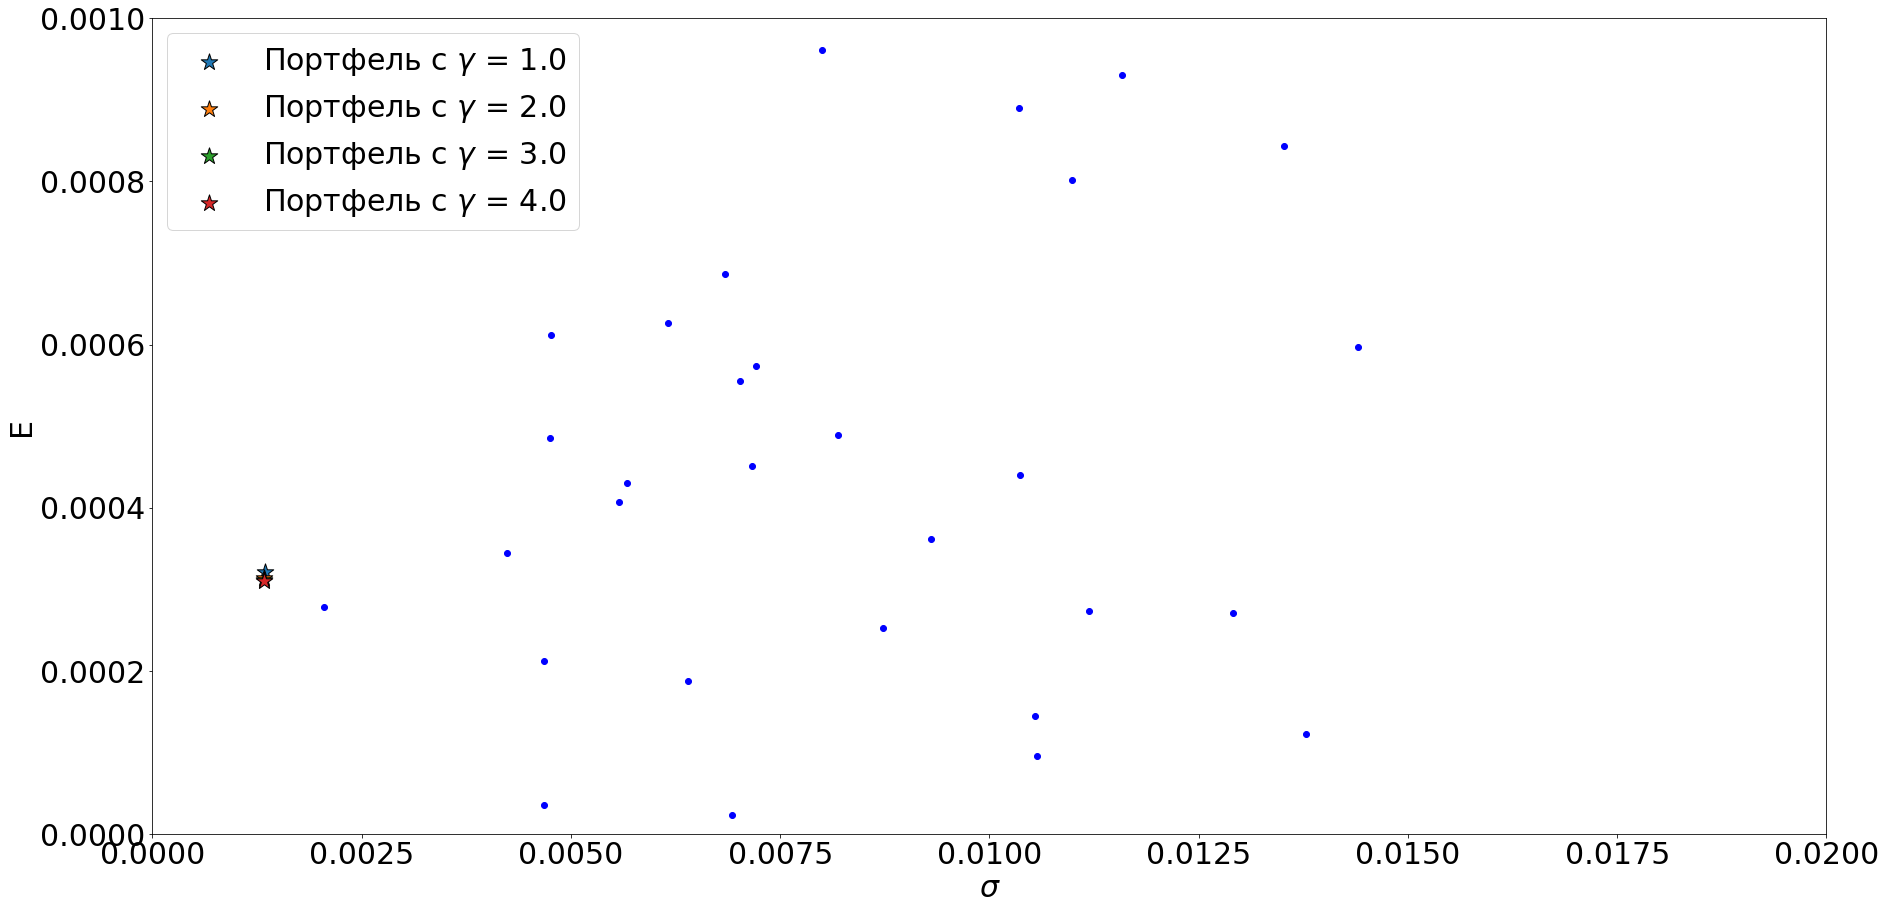

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(15)
plt.plot(std_50_arr, mean_50_arr, 'bo')
for ind, risk_level in enumerate(np.linspace(1, 4, 4)):
        plt.scatter(min_risk[ind], min_risk_preturn[ind],
                marker='*', s=300, edgecolors='black', label = 'Портфель с $\gamma$ = '+str(risk_level))
plt.legend()
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.rc('font', size=30)
plt.xlim([0, 0.020])
plt.ylim([0, 0.001])
plt.show()

**VaR значения для портфелей**

In [ ]:
for i in range(len(var_values)):
  print('VaR for portfolio with risk aversion = ' + str(i+1) + ': ' + str(var_values[i]))

VaR for portfolio with risk aversion = 1: 0.006494188208384632
VaR for portfolio with risk aversion = 2: 0.0064086694627933346
VaR for portfolio with risk aversion = 3: 0.006421013920431704
VaR for portfolio with risk aversion = 4: 0.006372893341007887


**Характеристика портфелей по составу**

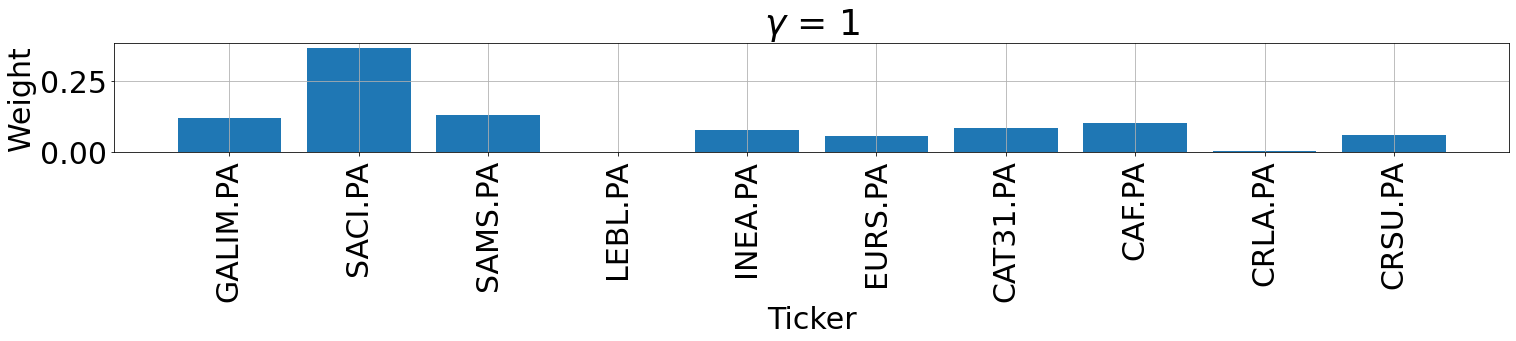

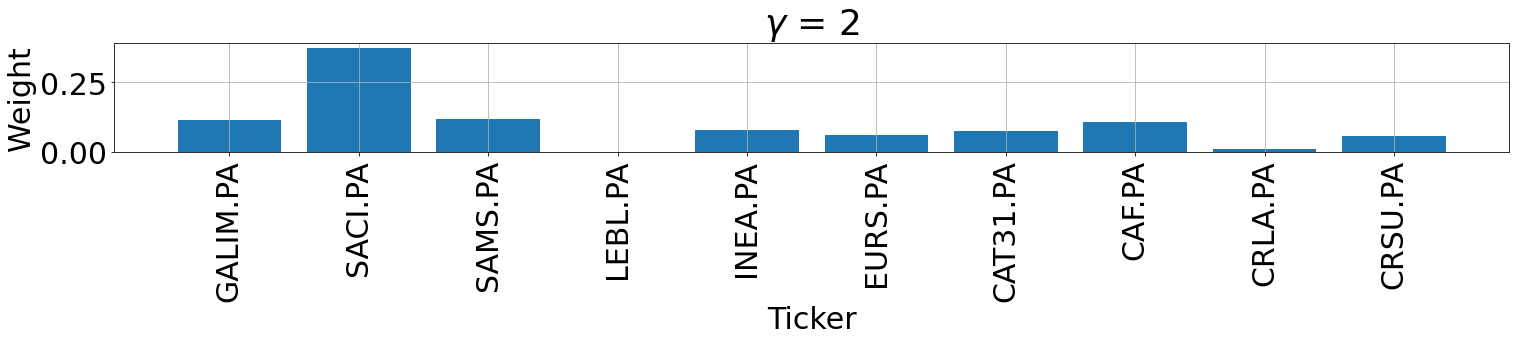

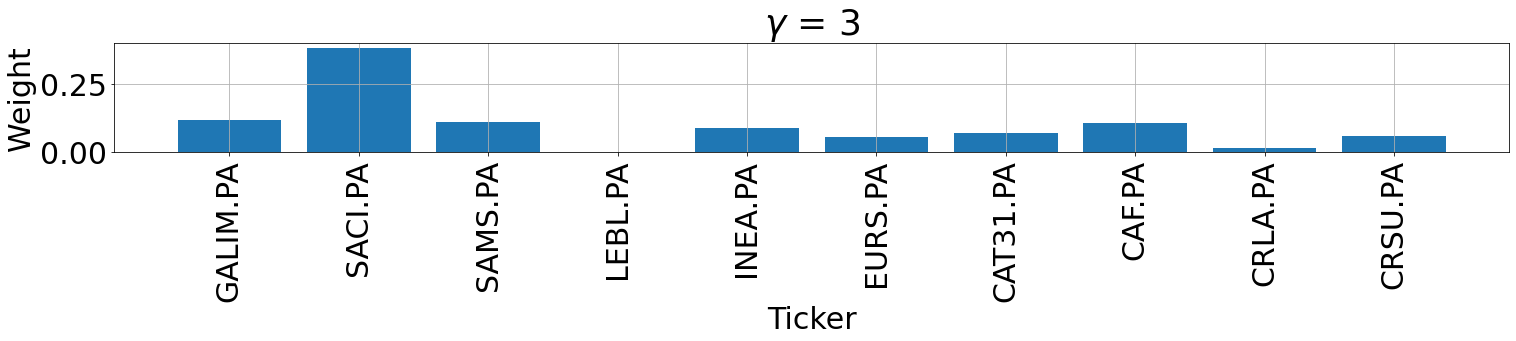

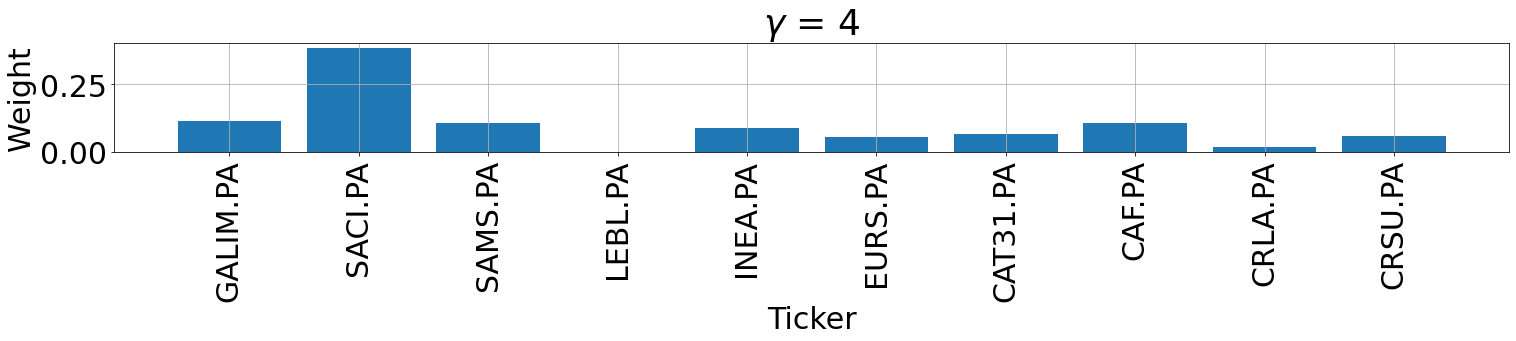

In [ ]:
for i in range(len(X_mins_)):
  plot_weights_histogram(X_mins_[i], unique, i+1)

**В случае отсутствия запрета на короткие продажи отрицательные доли имеет только один актив - LEBL.PA (manufactures Christmas lights and operates fireworks displays. The Company operates stores that retail party supplies including flags, cups and streamers) с минимальным значением -0.000222690406852672. Поэтому результаты для двух случаев (запрет коротких продаж и его отсутствие) очень схожи.**

**Актив SACI.PA по-прежнему имеет наибольшие доли во всех портфелях.**

**Характеристика VaR также зависит от значения $\gamma$. При уменьшении параметра $\gamma$ можно получить лучший по доходности порфель, но при этом значение под риском тоже увеличится.**

##**5.Markowitz-Tobin model**

**Среди выбранных 10 активов нет актива с нулевым риском, unique[0] и unique[1] имеют наименьший риск (активы GALIM.PA & SACI.PA)**

**Пусть средняя доходность от этих двух активов - доходность безрискового, виртуального актива**

In [ ]:
mean_nr = (mean_10var_arr[0]+mean_10var_arr[1])/2
std_nr = 0

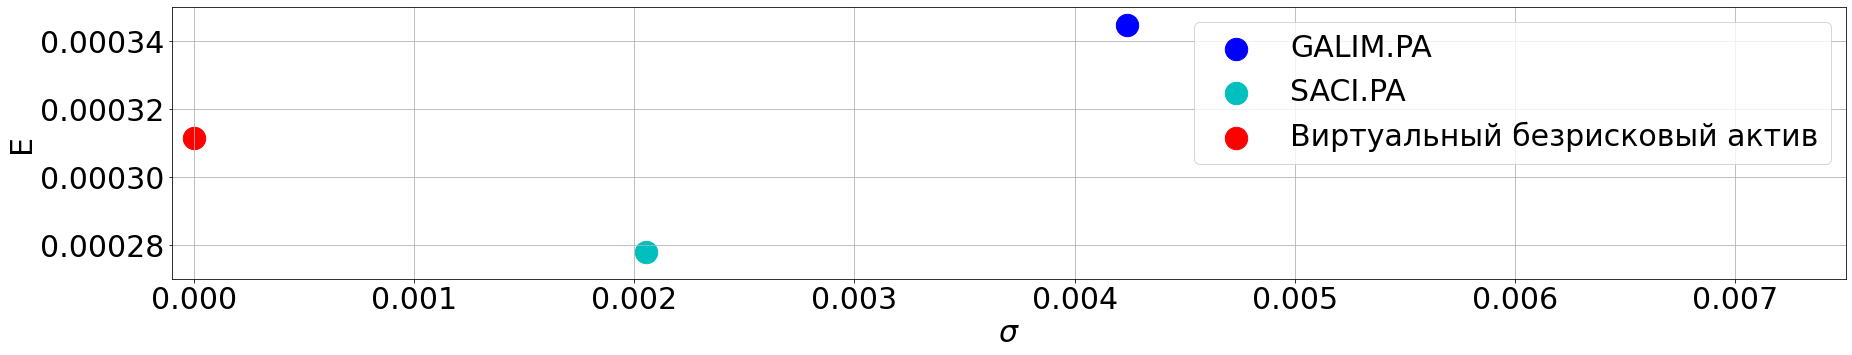

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.scatter(std_10var_arr[0], mean_10var_arr[0], marker='.', s=2000, color='blue', label = 'GALIM.PA')
plt.scatter(std_10var_arr[1], mean_10var_arr[1], marker='.', s=2000, color='c', label = 'SACI.PA')
plt.scatter(std_nr, mean_nr, marker='.', s=2000, color='red', label = 'Виртуальный безрисковый актив')
plt.legend()
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.rc('font', size=30)
plt.grid()
plt.xlim([-0.0001, 0.0075])
plt.ylim([0.00027, 0.00035])
plt.show()

##**$(E(x)-E_F)/\sigma(x)→max$**

In [ ]:
from scipy import optimize
def objective_function(x, cov_matix, mean_vector, risk_free_mean):
    f = float(-(x.dot(mean_vector) - risk_free_mean) / np.sqrt(np.dot(np.dot(x, cov_matrix), x.T)))
    return f
def optimal_portfolio_sharp_ratio(profits, risk_free_mean, N, cov_matrix,returns,bounds):
    X = np.ones(N)
    X = X / X.sum()
    bounds = bounds * N
    constraints=[]
    constraints.append({'type': 'eq', 'fun': lambda X: np.sum(X) - 1.0})
    minimize = optimize.minimize(objective_function, X,args=(cov_matrix, returns, risk_free_mean,), method='SLSQP',constraints=constraints,bounds=bounds).x
    return minimize
def optimal_portfolio_computing(profitability,means,risk_free_mean, allow_short = False):
    results = {}
    N = 10
    r_matrix, _, cov_matrix = get_return_mean_cov(profitability)
    E = means
    bounds = ((-1, 1),) if allow_short else ((0, 1),)
    optim_portfolio_weights =  optimal_portfolio_sharp_ratio(E,risk_free_mean,N,cov_matrix,E, bounds)
    results['optim_weights'] = optim_portfolio_weights
    results['best_sharp_sigma'] = get_risk(optim_portfolio_weights, cov_matrix)
    results['best_sharp_return'] = np.dot(optim_portfolio_weights, E)
    results['losses'] = -np.dot(r_matrix, optim_portfolio_weights)
    return results

**Без ограничений на короткие продажи**

In [ ]:
short_results = optimal_portfolio_computing(profitability, mean_10var_arr, mean_nr, allow_short=True)

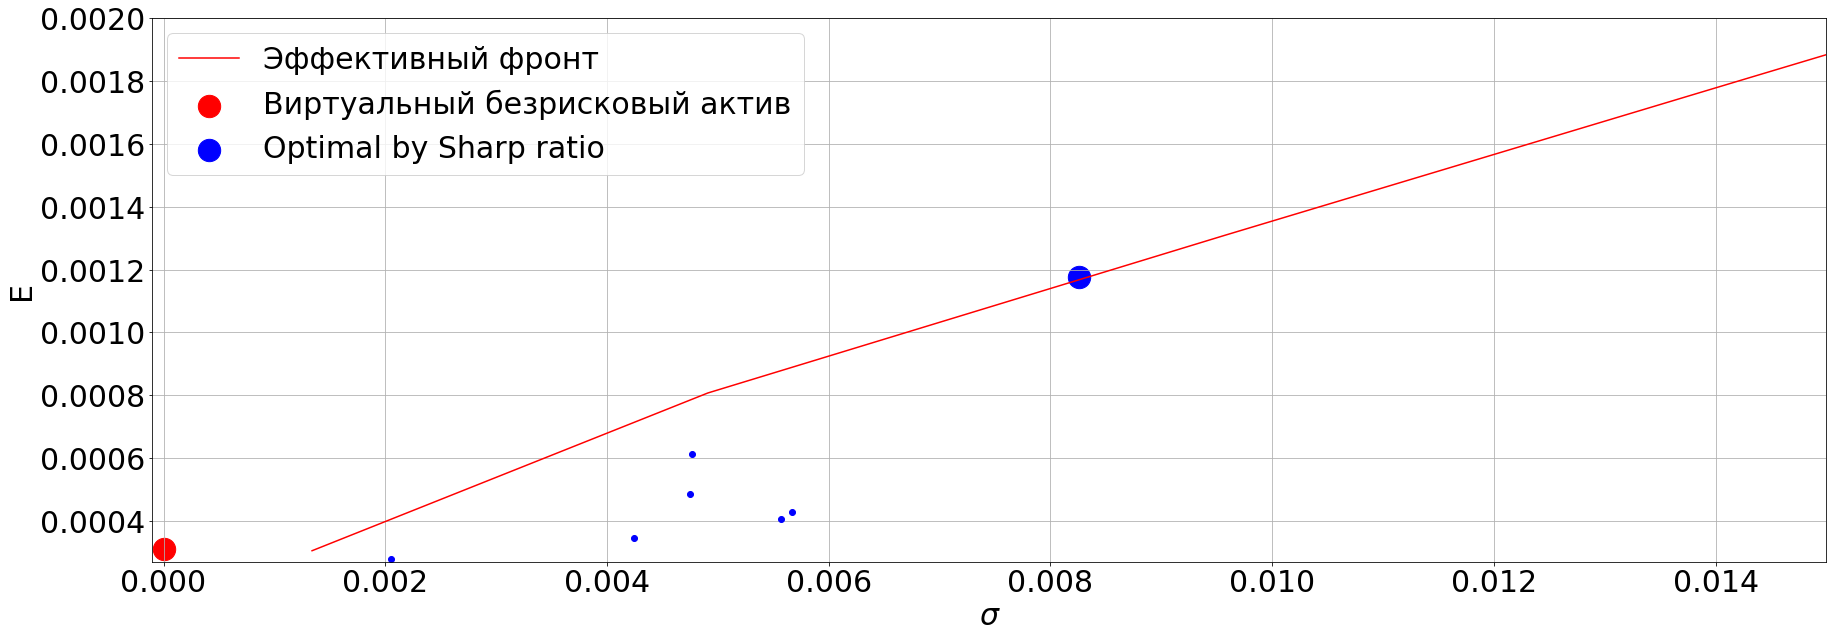

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_10var_arr, mean_10var_arr, 'bo')
plt.scatter(std_nr, mean_nr, marker='.', s=2000, color='red', label = 'Виртуальный безрисковый актив')
plt.scatter(short_results['best_sharp_sigma'], short_results['best_sharp_return'], marker='.', s=2000, color='blue', label = 'Optimal by Sharp ratio')
plt.plot(sigmas_10var, e_10var, 'r-', label='Эффективный фронт')
plt.legend()
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.rc('font', size=30)
plt.xlim([-0.0001, 0.015])
plt.ylim([0.00027, 0.002])
plt.grid()
plt.show()

**VaR оптимального по Шарпу портфеля**

In [ ]:
prof_matrix=[]
tickers_=[]
for i in range(len(profitability.columns)):
  if profitability.columns[i] in unique:
    tickers_.append(profitability.columns[i])
    prof_matrix.append(sorted(profitability[profitability.columns[i]].values))
prof_opt_portfolio = []
time = []
for i in range(1):
  for k in range(len(prof_matrix[0])):
    sum = 0
    for j in range(len(short_results['optim_weights'])):
      sum += prof_matrix[j][k] * short_results['optim_weights'][j]
    time.append(sum)
  prof_opt_portfolio.append(time)
  time = []
minus_profitability_matrix = []
for i in range(len(prof_opt_portfolio)):
  minus_profitability_matrix.append(np.multiply(prof_opt_portfolio[i],-1))
var_values=[]
for i in range(len(minus_profitability_matrix)):
  counter_dict = dict(Counter(minus_profitability_matrix[i]))
  counter_dict_keys = list(counter_dict.keys())
  var_value_for_ticker = -5
  j = 0
  sum = counter_dict[counter_dict_keys[0]]
  while sum/observation_number <= 1-gamma:
    j=j+1
    sum+=counter_dict[counter_dict_keys[j]]
  var_value_for_ticker = counter_dict_keys[j]
  var_values.append(var_value_for_ticker)

In [ ]:
print('VaR value = ' + str(var_values[0]))

VaR value = 0.00900104089009503


**Характеристика оптимального по Шарпу портфеля по составу**

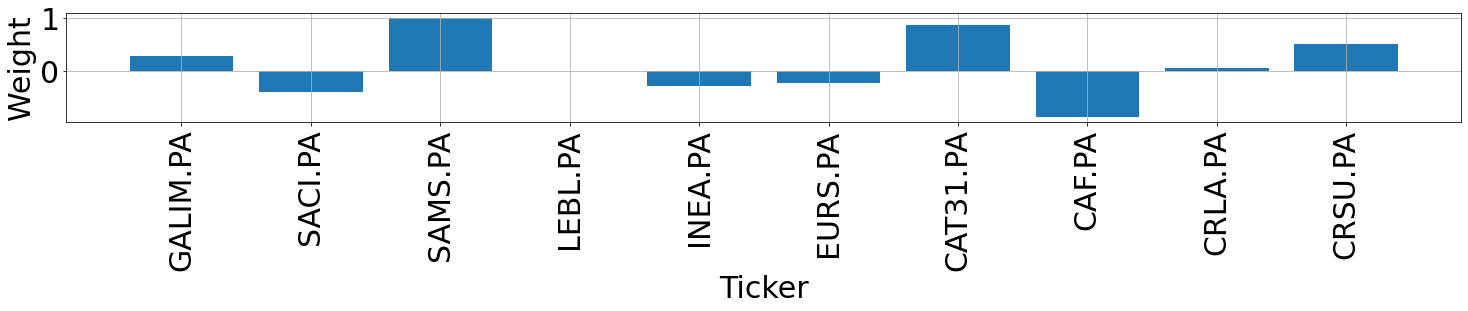

In [ ]:
plot_weights_histogram(short_results['optim_weights'], unique, 0, False)

**Кроткие продажи запрещены**

In [ ]:
short_results = optimal_portfolio_computing(profitability, mean_10var_arr, mean_nr)

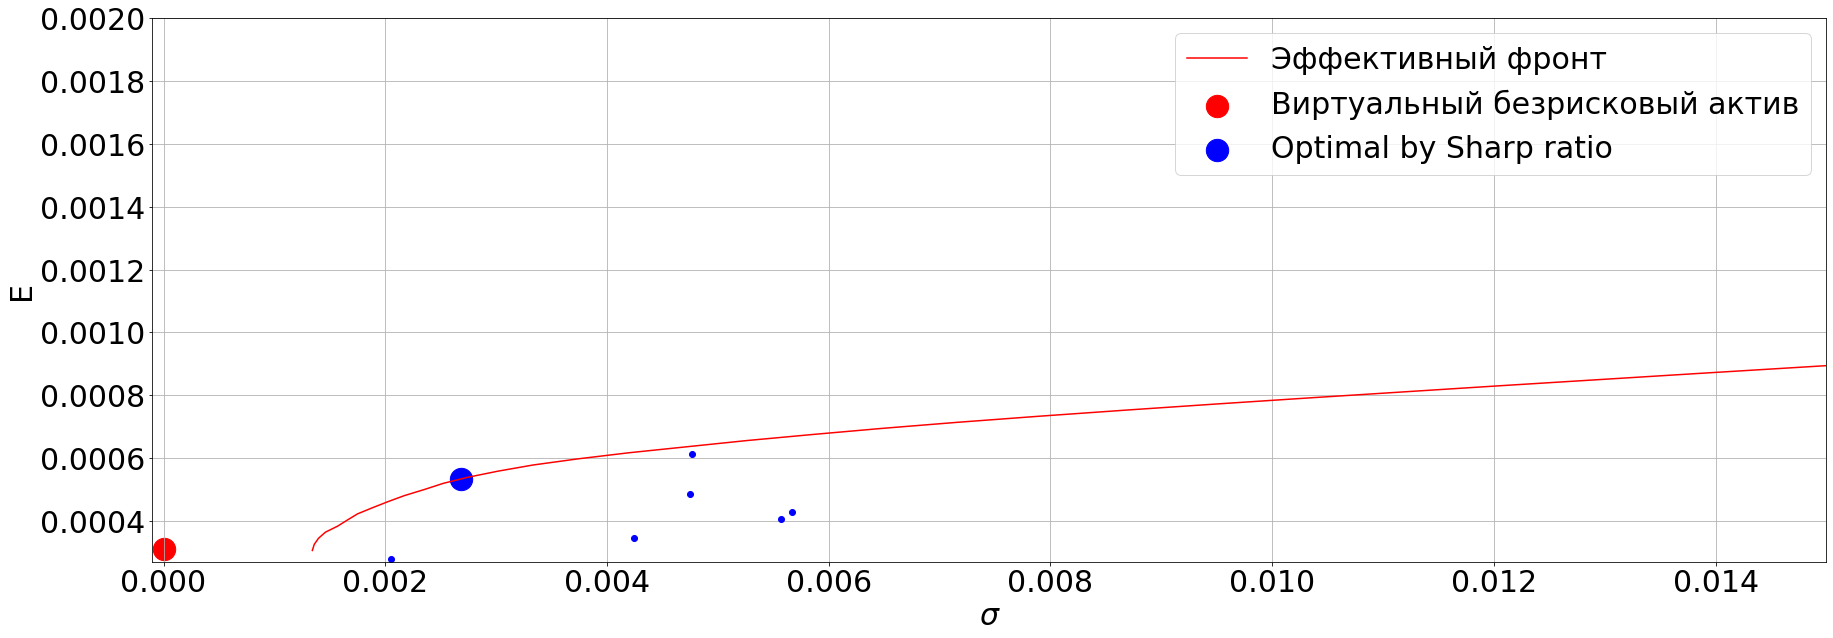

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_10var_arr, mean_10var_arr, 'bo')
plt.scatter(std_nr, mean_nr, marker='.', s=2000, color='red', label = 'Виртуальный безрисковый актив')
plt.scatter(short_results['best_sharp_sigma'], short_results['best_sharp_return'], marker='.', s=2000, color='blue', label = 'Optimal by Sharp ratio')
plt.plot(sigmas_10var_ns, e_10var_ns, 'r-', label='Эффективный фронт')
plt.legend()
plt.ylabel('E')
plt.xlabel('$\sigma$')
plt.rc('font', size=30)
plt.xlim([-0.0001, 0.015])
plt.ylim([0.00027, 0.002])
plt.grid()
plt.show()

**VaR оптимального по Шарпу портфеля (короткие продажи запрещены)**

In [ ]:
print('VaR value = ' + str(var_values[0]))

VaR value = 0.007126134950115886


**Характеристика оптимального по Шарпу портфеля по составу (короткие продажи запрещены)**

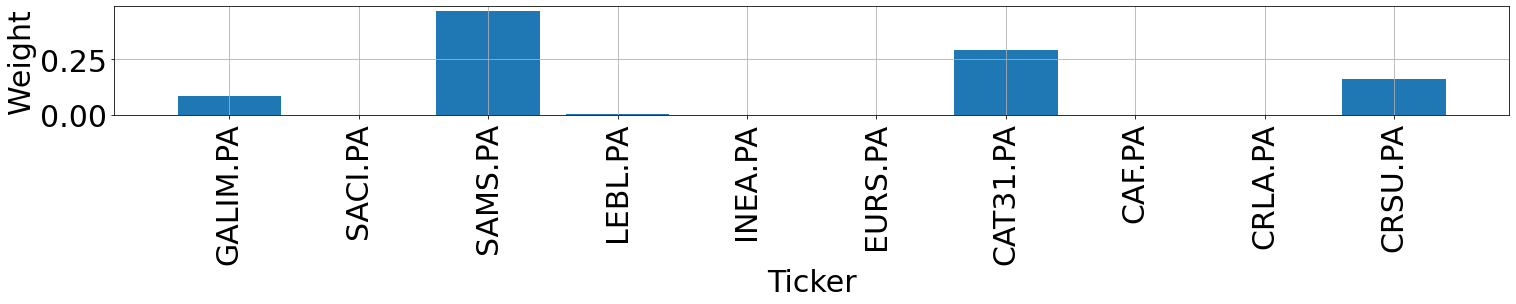

In [ ]:
plot_weights_histogram(short_results['optim_weights'], unique, 0, False)

**Доходность портфеля, оптимального по Шарпу без ограничений на короткие продажи примерно в 2 раза больше доходности для портфеля оптимального по Шарпу без коротких продаж.**

**Доля актива SACI.PA отрицательна или минимальна, в отличие от предыдущих портфелей, где этот актив вносил наибольший вклад.**

##**6.CAC40 Index**

**Состав индекса:**

**LVMH (MC) Consumer Discretionary 11.76% \
TOTALENERGIES (TTE) Energy 9.20% \
SANOFI (SAN) Health Care 7.98% \
L'OREAL (OR) Consumer Discretionary 6.02% \
AIR LIQUIDE (AI) Basic Materials 4.86% \
SCHNEIDER ELECTRIC (SU) Industrials 4.68% \
AIRBUS (AIR) Industrials 3.97% \
BNP PARIBAS ACT.A (BNP) Financials 3.72% \
VINCI (DG) Industrials 3.33% \
AXA (CS) Financials 3.24% \
ESSILORLUXOTTICA (EL) Health Care 3.22% \
KERING (KER) Consumer Discretionary 2.68% \
PERNOD RICARD (RI) Consumer Staples 2.67% \
DANONE (BN) Consumer Staples 2.53% \
HERMES INTL (RMS) Consumer Discretionary 2.46% \
SAFRAN (SAF) Industrials 2.35% \
CAPGEMINI (CAP) Technology 1.91% \
STELLANTIS NV (STLA) Consumer Discretionary 1.75% \
DASSAULT SYSTEMES (DSY) Technology 1.70% \
ORANGE (ORA) Telecommunications 1.52% \
ENGIE (ENGI) Utilities 1.46% \
SAINT GOBAIN (SGO) Industrials 1.43% \
STMICROELECTRONICS (STM) Technology 1.39% \
LEGRAND (LR) Industrials 1.37% \
MICHELIN (ML) Consumer Discretionary 1.28% \
TELEPERFORMANCE (TEP) Industrials 1.25% \
SOCIETE GENERALE (GLE) Financials 1.23% \
VEOLIA ENVIRON. (VIE) Utilities 1.11% \
ARCELORMITTAL SA (MT) Basic Materials 1.05% \
THALES (HO) Industrials 0.91% \
CREDIT AGRICOLE (ACA) Financials 0.88% \
PUBLICIS GROUPE SA (PUB) Consumer Discretionary 0.77% \
CARREFOUR (CA) Consumer Staples 0.73% \
EUROFINS SCIENT. (ERF) Health Care 0.68% \
WORLDLINE (WLN) Industrials 0.61% \
VIVENDI SE (VIV) Consumer Discretionary 0.55% \
ALSTOM (ALO) Industrials 0.50% \
BOUYGUES (EN) Industrials 0.45% \
UNIBAIL-RODAMCO-WE (URW) Real Estate 0.42% \
RENAULT (RNO) Consumer Discretionary 0.36%** \

In [ ]:
all_tickers = list(data['Adj Close'].columns)

In [ ]:
cac40_tickers = ['MC.PA', 'TTE.PA', 'SAN.PA', 'OR.PA', 'AI.PA', 'SU.PA', 'AIR.PA', 'BNP.PA', 'DG.PA', 'CS.PA', 'EL.PA', 'KER.PA', 'RI.PA', 'BN.PA', 'RMS.PA', 'SAF.PA', 'CAP.PA', 'STLA.PA', 'DSY.PA', 'ORA.PA', 'ENGI.PA', 'SGO.PA', 'STM.PA', 'LR.PA', 'ML.PA', 'TEP.PA', 'GLE.PA', 'VIE.PA', 'MT.PA', 'HO.PA', 'ACA.PA', 'PUB.PA', 'CA.PA', 'ERF.PA', 'WLN.PA', 'VIV.PA', 'ALO.PA', 'EN.PA', 'URW.PA', 'RNO.PA']
cac40_shares = [0.1176,0.0920,0.0798,0.0602,0.0486,0.0468,0.0397,0.0372,0.0333,0.0324,0.0322,0.0268,0.0267,0.0253,0.0246,0.0235,0.0191,0.0175,0.0170,0.0152,0.0146,0.0143,0.0139,0.0137,0.0128,0.0125,0.0123,0.0111,0.0105,0.0091,0.0088,0.0077,0.0073,0.0068,0.0061,0.0055,0.0050,0.0045,0.0042,0.0038000000000002]

**Характеристика индекса рынка CAC40 по составу**

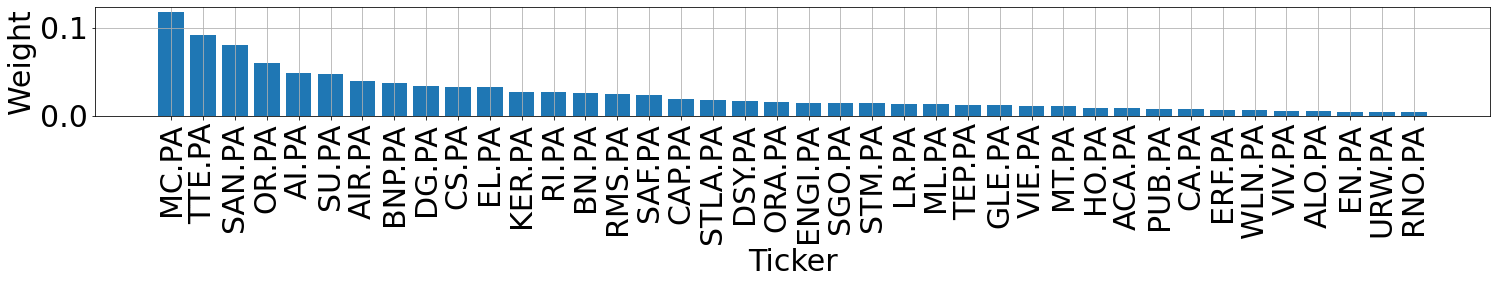

In [ ]:
plot_weights_histogram(cac40_shares, cac40_tickers, 0, False)

**MC.PA - Moët Hennessy Louis Vuitton\
TTE.PA - TotalEnergies\
SAN.PA - Sanofi**

In [ ]:
cac40_tickers_ = []
cac40_shares_ = []
for i in range(len(cac40_tickers)):
  if cac40_tickers[i] in profitability.columns:
    cac40_tickers_.append(cac40_tickers[i])
    cac40_shares_.append(cac40_shares[i])
cac40_tickers = cac40_tickers_
cac40_shares = cac40_shares_

**Проверка на нормальное распределение CAC40**

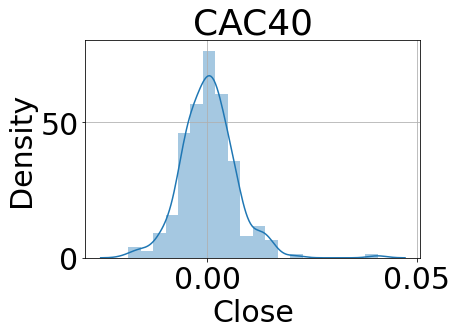

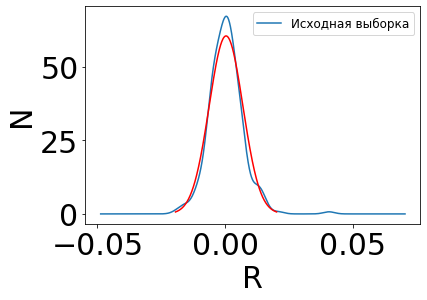

In [ ]:
plt.grid()
sns.distplot(profitability_index, bins=20)
plt.title('CAC40')
plt.show()

mean = np.mean(profitability_index)
sigma = np.var(profitability_index)
std = math.sqrt(sigma)
x = np.linspace(mean - 3*std, mean + 3*std, num = 255)
pdf = norm.pdf(x , loc = mean, scale = std)
pd.DataFrame(profitability_index).plot.kde()
plt.xlabel('R')
plt.ylabel('N')
plt.legend(['Исходная выборка'], fontsize=12)
plt.plot(x,pdf , color = 'red')

**Проверка на нормальное распределение с помощью normaltest (D’Agostino and Pearson’s)**

In [ ]:
alpha = 0.05
k2, p_value = stats.normaltest(profitability_index)
answer = 'не отклоняется' if p_value > alpha else 'отклоняется'
print("\t {}: Гипотеза о нормальном распределении {}".format('CAC40', answer))

	 CAC40: Гипотеза о нормальном распределении отклоняется


**Проверка на нормальное распределение с помощью теста Колмогорова**

In [ ]:
mean_cac40 = np.mean(profitability_index)
dispersion_cac40 = np.std(profitability_index)
ks_statistic, p_value = kstest((profitability_index-mean_cac40)/dispersion_cac40, 'norm')
answer = 'не отклоняется' if p_value > alpha else 'отклоняется'
print("\t {}: Гипотеза о нормальном распределении {}".format('CAC40', answer))

	 CAC40: Гипотеза о нормальном распределении не отклоняется


**Карта активов, входящих в индекс рынка**

In [ ]:
std_arr_cac40=[]
mean_arr_cac40=[]
for col in profitability.columns:
  if col in cac40_tickers:
    std_arr_cac40.append(np.std(profitability[col].values))
    mean_arr_cac40.append(np.mean(profitability[col].values))

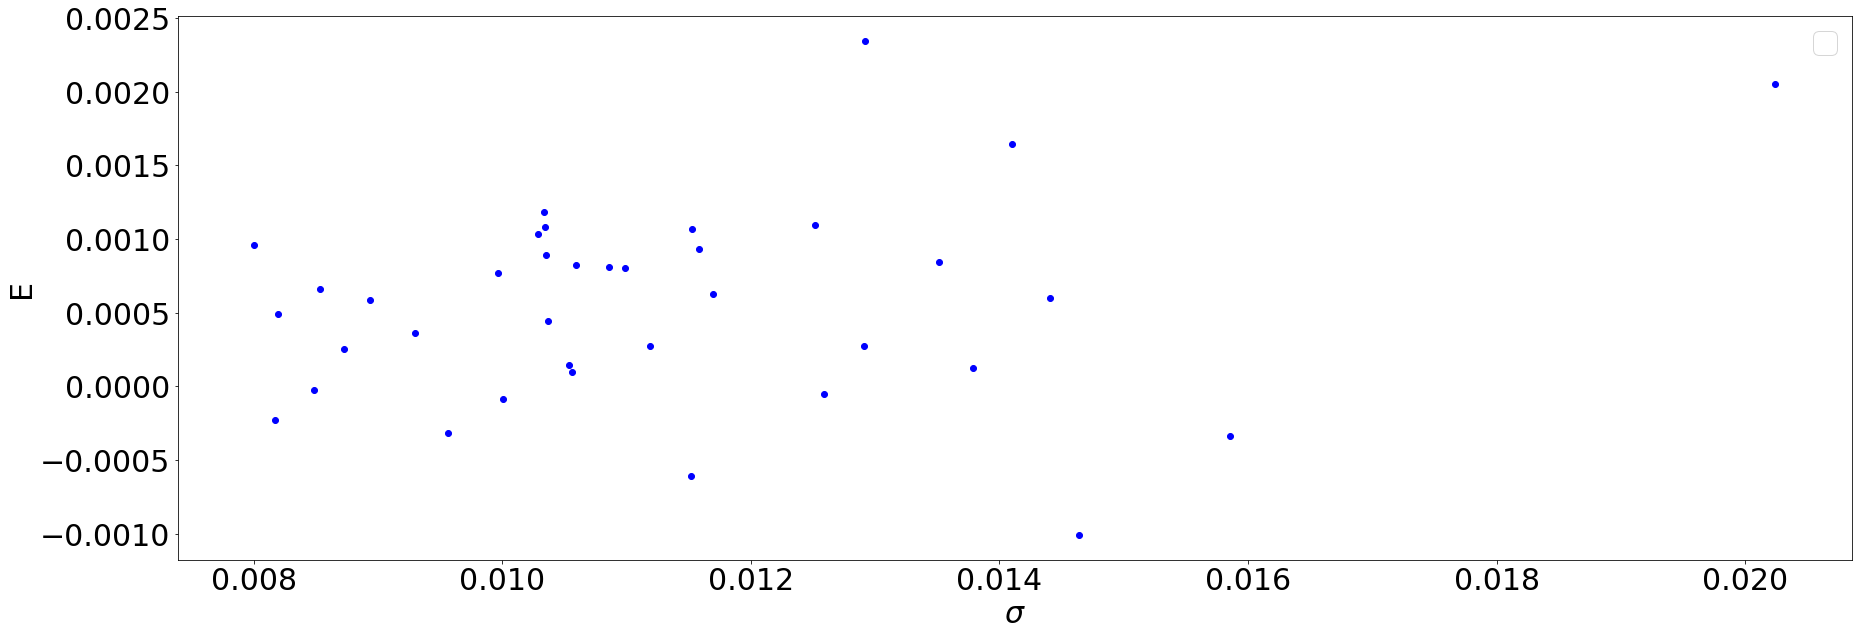

In [ ]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(std_arr_cac40, mean_arr_cac40, 'bo')
plt.legend()
plt.ylabel('E',size=30)
plt.xlabel('$\sigma$', size=30)
plt.rc('font', size=30)
plt.show()

**Вычисление матрицы ковариаций**

In [ ]:
unique = cac40_tickers
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(profitability)

In [ ]:
from numpy import linalg as LA
wb, vb = LA.eigh(cov_matrix)

**Cобственные значения**

In [ ]:
wb

array([2.04707102e-05, 2.18899500e-05, 2.32095793e-05, 2.42137282e-05,
       2.61921105e-05, 2.82806949e-05, 3.15930453e-05, 3.21308608e-05,
       3.61132686e-05, 3.92381668e-05, 4.21339205e-05, 4.45574048e-05,
       4.85104085e-05, 5.01823387e-05, 5.30617130e-05, 5.70589889e-05,
       5.86219005e-05, 6.43487207e-05, 6.67580378e-05, 7.47955447e-05,
       7.93802062e-05, 8.15925166e-05, 8.27026263e-05, 8.93700016e-05,
       9.24917293e-05, 9.66058950e-05, 1.16169152e-04, 1.35372292e-04,
       1.39790281e-04, 1.51679765e-04, 1.55113165e-04, 1.80804410e-04,
       1.95199514e-04, 2.15194653e-04, 3.26137165e-04, 4.33160514e-04,
       1.55455213e-03])

**Новый индекс рынка**

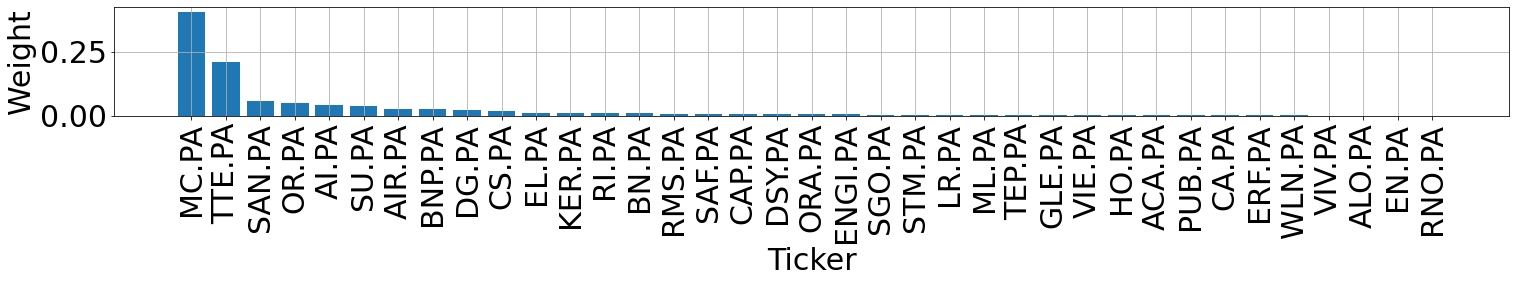

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(cov_matrix)
explained_variance = pca.explained_variance_ratio_
plot_weights_histogram(explained_variance, cac40_tickers, 0, False)

**В индексе рынка, полученном с помощью метода главных компонент "лидирующие" позицие остаются за активами MC.PA и TTE.PA, но при этом их доли возрастают, а доли других активов - уменьшаются.**

In [ ]:
%%shell
jupyter nbconvert --to html /content/FrenchStockAnalysisLab2.ipynb

[NbConvertApp] Converting notebook /content/FrenchStockAnalysisLab2.ipynb to html
[NbConvertApp] Writing 3375713 bytes to /content/FrenchStockAnalysisLab2.html
